In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist, cosine
from scipy.ndimage import convolve1d
from sklearn.cluster import DBSCAN
from sklearn.cluster import OPTICS
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
#import tensorflow as tf
#from joblib import Parallel, delayed

from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors

import pandas as pd
import xarray as xr
from netCDF4 import Dataset, num2date, date2num
from datetime import datetime, timedelta
import os

import seaborn as sns
import cmocean as cmocn

%matplotlib inline

In [2]:
ds = xr.open_dataset('../rainFlagRemovedBuoyDataBadQualityRemovedMatchupAmbuguitiesAdded.nc')
ds = ds.drop_vars(['ambiguity_obj'])
#ds = ds.drop_vars(['ambiguities'])
#ds = xr.open_dataset('../rainFlagRemovedBuoyDataBadQualityRemovedMatchup.nc')
df = ds.to_dataframe()
df_orig = df.copy()

In [3]:
list(ds.variables.keys())

['count',
 'Wind Direction (TAO)',
 'WDIR_QC',
 'WDIR_DM',
 'Wind Speed (TAO)',
 'WSPD_QC',
 'WSPD_DM',
 'Zonal Wind Speed (TAO)',
 'Meridional Wind Speed (TAO)',
 'Sea Surface Temperature (TAO)',
 'SST_QC',
 'SST_DM',
 'Relative Humidity (TAO)',
 'RELH_QC',
 'RELH_DM',
 'Air Temperature (TAO)',
 'AIRT_QC',
 'AIRT_DM',
 'Neutral Wind Speed at 10m (TAO)',
 'Wind Speed at 10m (TAO)',
 'mean WSPD 20min',
 'std. dev. WSPD 20min',
 'mean WSPD_10N 20min',
 'std. dev. WSPD_10N 20min',
 'mean Ux_10N 20min',
 'std. dev. Ux_10N 20min',
 'mean Vy_10N 20min',
 'std. dev. Vy_10N 20min',
 'mean WDIR 20min',
 'std. dev. WDIR 20min',
 'mean cosWDIR 20min',
 'std. dev. cosWDIR 20min',
 'mean sinWDIR 20min',
 'std. dev. sinWDIR 20min',
 'mean WSPD 30min',
 'std. dev. WSPD 30min',
 'mean WSPD_10N 30min',
 'std. dev. WSPD_10N 30min',
 'mean Ux_10N 30min',
 'std. dev. Ux_10N 30min',
 'mean Vy_10N 30min',
 'std. dev. Vy_10N 30min',
 'mean WDIR 30min',
 'std. dev. WDIR 30min',
 'mean cosWDIR 30min',
 'std. d

In [4]:
ds

<xarray.Dataset>
Dimensions:                                                         (
                                                                     count: 148727)
Coordinates:
  * count                                                           (count) int64 ...
Data variables: (12/258)
    Wind Direction (TAO)                                            (count) float32 ...
    WDIR_QC                                                         (count) float32 ...
    WDIR_DM                                                         (count) |S1 ...
    Wind Speed (TAO)                                                (count) float32 ...
    WSPD_QC                                                         (count) float32 ...
    WSPD_DM                                                         (count) |S1 ...
    ...                                                              ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 110 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 110 min mean)  (count) float64 ...
    Speed Difference (QuikSCAT - TAO 120 min mean)                  (count) float64 ...
    Direction Difference (QuikSCAT - TAO 120 min mean)              (count) float64 ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 120 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 120 min mean)  (count) float64 ...

In [5]:
#list(df.keys())

In [6]:
df['cos(Direction Difference (QuikSCAT - TAO))'] = np.cos(np.deg2rad(df['Direction Difference (QuikSCAT - TAO)']))
df['sin(Direction Difference (QuikSCAT - TAO))'] = np.sin(np.deg2rad(df['Direction Difference (QuikSCAT - TAO)']))


for timeWindow in range(20,130,10):
    df[f'cos(Direction Difference (QuikSCAT - TAO {timeWindow} min mean))'] = np.cos(np.deg2rad(df[f'Direction Difference (QuikSCAT - TAO {timeWindow} min mean)']))
    df[f'sin(Direction Difference (QuikSCAT - TAO {timeWindow} min mean))'] = np.sin(np.deg2rad(df[f'Direction Difference (QuikSCAT - TAO {timeWindow} min mean)']))


In [7]:
timeWindow = 90
# selectX = [f'Speed Difference (QuikSCAT - TAO) {timeWindow} min mean)',
#           f'cos(Direction Difference (QuikSCAT - TAO)) {timeWindow} min mean))',
#           f'sin(Direction Difference (QuikSCAT - TAO)) {timeWindow} min mean))']

selectX = [f'Speed Difference (QuikSCAT - TAO)',# {timeWindow} min mean)',
          f'cos(Direction Difference (QuikSCAT - TAO))',# {timeWindow} min mean))',
          f'sin(Direction Difference (QuikSCAT - TAO))']# {timeWindow} min mean))']


X = df[selectX]

normX = (X - X.mean(axis=0))/ X.std(axis=0)

# kmeans = KMeans(n_clusters=17, random_state=0, n_init="auto", max_iter = 10000).fit(normX)
# df['label'] = kmeans.labels_

dbscan = DBSCAN(eps=0.15, min_samples= 500)
df['label'] = dbscan.fit_predict(normX)

# optics = OPTICS(min_samples=50 ) #cluster_method='dbscan', eps=0.25)
# df['label'] = optics.fit_predict(normX)



/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

Text(0.1, 0.95, 'B')

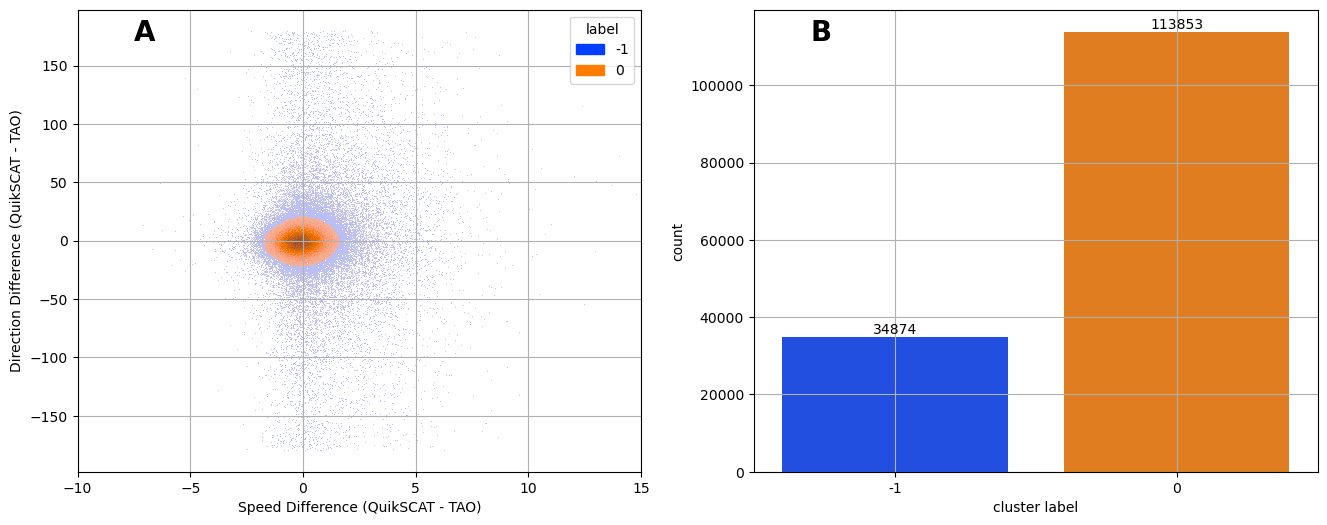

In [8]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# ax.remove()  # Remove the existing second subplot
# ax = fig.add_subplot(121, projection='polar')
xlabel = f'Speed Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'
ylabel = f'Direction Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'

s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')

ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax.set_xlim(-10,15)

ax = axes[1]
s = sns.countplot(df, x='label',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])

ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('cluster label')
#ax.set_ylabel('cluster label')

ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#plt.savefig('PDF_byCluster_10min.png', dpi=100)

In [9]:
# df['nudge wind direction'] = (ds['nudge_wind_direction']-90)%360
# dummy = df['nudge wind direction']
# mmask = dummy >180
# dummy[mmask] = dummy[mmask] - 360
# df['nudge wind direction'] = dummy

# df['TAO speedDiff with NCEP'] = df['Wind Speed (TAO)'] - ds['nudge_wind_speed']
# df['TAO direcDiff with NCEP'] = (df['Wind Direction (TAO)'] - df['nudge wind direction'])%360
# dummy = df['TAO direcDiff with NCEP']
# mmask = dummy >180
# dummy[mmask] = dummy[mmask] - 360
# df['TAO direcDiff with NCEP'] = dummy


# xlabel = 'TAO speedDiff with NCEP'
# ylabel = 'TAO direcDiff with NCEP'

# fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

# ax = axes[0]
# s = sns.kdeplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,levels=10, 
#                 #cbar = True,#hue='label', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
# ax.grid()

# ax = axes[1]
# s = sns.kdeplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,levels=10, 
#                 #cbar = True,#hue='label', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
# ax.grid()

In [10]:
# df['QuikSCAT speedDiff with NCEP'] = df['Wind Speed (QuikSCAT)'] - ds['nudge_wind_speed']
# df['QuikSCAT direcDiff with NCEP'] = (df['Wind Direction (QuikSCAT)'] - df['nudge wind direction'])%360
# dummy = df['QuikSCAT direcDiff with NCEP']
# mmask = dummy >180
# dummy[mmask] = dummy[mmask] - 360
# df['QuikSCAT direcDiff with NCEP'] = dummy


# xlabel = 'QuikSCAT speedDiff with NCEP'
# ylabel = 'QuikSCAT direcDiff with NCEP'

# fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

# ax = axes[0]
# s = sns.kdeplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,levels=10, 
#                 #cbar = True,#hue='label', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
# ax.grid()

# ax = axes[1]
# s = sns.kdeplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,levels=10, 
#                 #cbar = True,#hue='label', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
# ax.grid()

/tmp/ipykernel_1451034/2127781858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/tmp/ipykernel_1451034/2127781858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: Fu

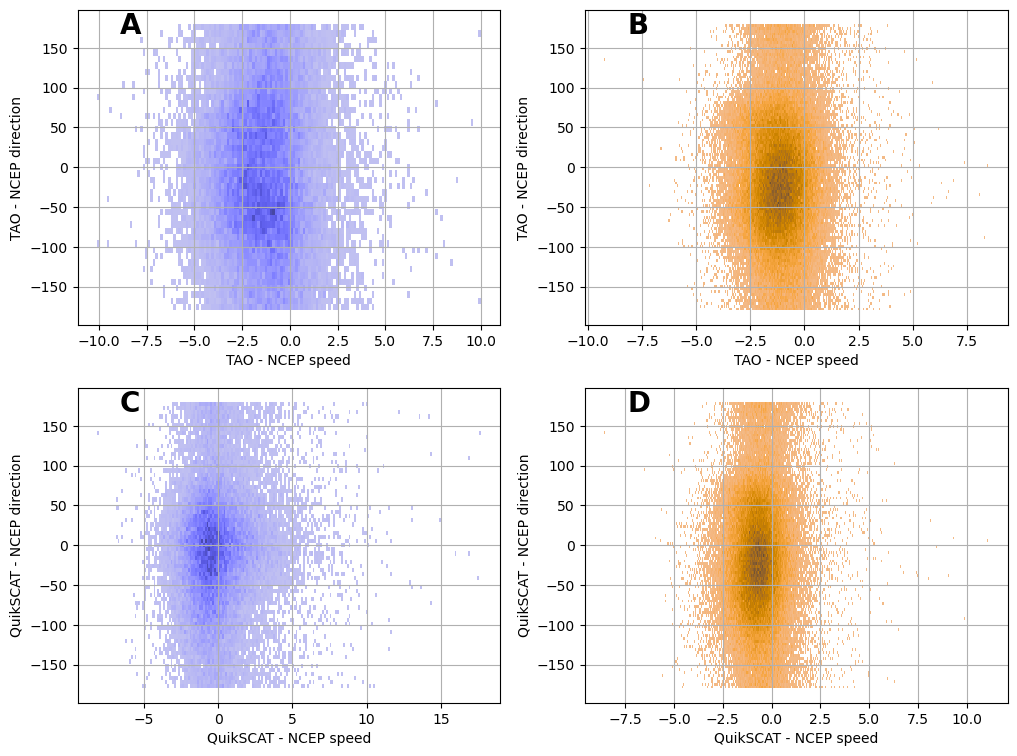

In [11]:
df['nudge wind direction'] = (ds['nudge_wind_direction']-90)%360
dummy = df['nudge wind direction']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['nudge wind direction'] = dummy

df['TAO - NCEP speed'] = df['Wind Speed (TAO)'] - ds['nudge_wind_speed']
df['TAO - NCEP direction'] = (df['Wind Direction (TAO)'] - df['nudge wind direction'])%360
dummy = df['TAO - NCEP direction']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['TAO - NCEP direction'] = dummy


xlabel = 'TAO - NCEP speed'
ylabel = 'TAO - NCEP direction'

fig,  axes = plt.subplots(nrows =2 , ncols = 2, figsize=(12,9))

ax = axes[0,0 ]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                #cbar = True,#hue='label', common_norm=True, #cbar = True,
                #palette = sns.color_palette("bright"), 
                 color = 'blue', 
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax = axes[0, 1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                #cbar = True,#hue='label', common_norm=True, #cbar = True,
                #palette = sns.color_palette("bright"),
                 color = 'orange',
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

df['QuikSCAT - NCEP speed'] = df['Wind Speed (QuikSCAT)'] - ds['nudge_wind_speed']
df['QuikSCAT - NCEP direction'] = (df['Wind Direction (QuikSCAT)'] - df['nudge wind direction'])%360
dummy = df['QuikSCAT - NCEP direction']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['QuikSCAT - NCEP direction'] = dummy


xlabel = 'QuikSCAT - NCEP speed'
ylabel = 'QuikSCAT - NCEP direction'

ax = axes[1, 0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                #cbar = True,#hue='label', common_norm=True, #cbar = True,
                #palette = sns.color_palette("bright"), 
                 color = 'blue',
                 ax = ax)
ax.text(0.1, 0.95, 'C', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)
ax.grid()

ax = axes[1,1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                #cbar = True,#hue='label', common_norm=True, #cbar = True,
                #palette = sns.color_palette("bright"), 
                 color ='orange',
                 ax = ax)
ax.text(0.1, 0.95, 'D', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)
ax.grid()

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/131812622.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

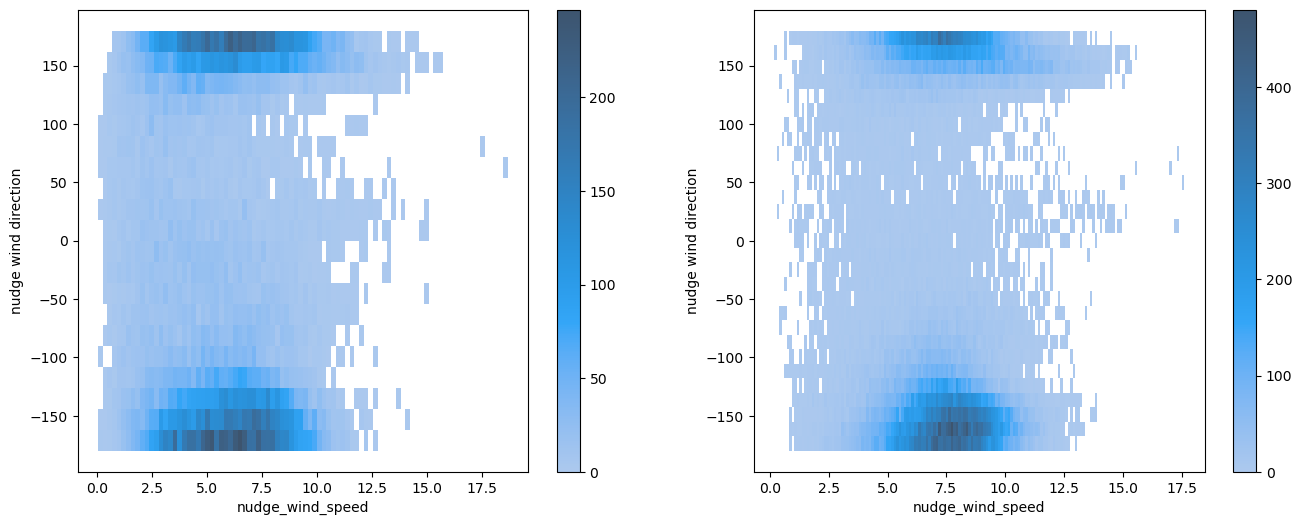

In [12]:
xlabel = 'nudge_wind_speed'
ylabel = 'nudge wind direction'


fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/2891686435.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

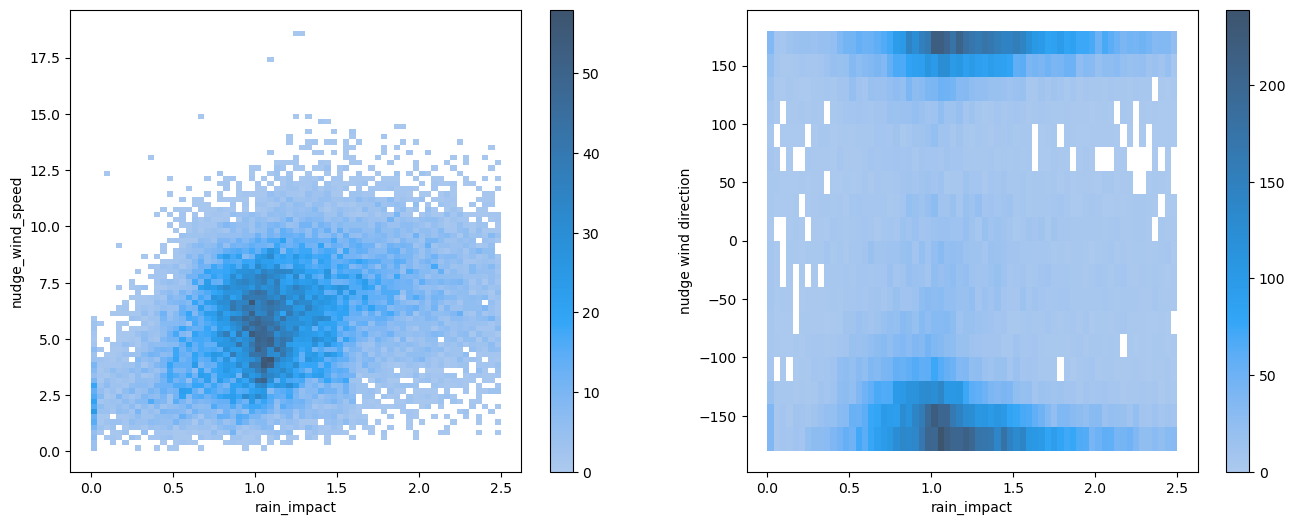

In [13]:
#'cross_track_wind_speed_bias',
xlabel = 'rain_impact'
ylabel = 'nudge_wind_speed'


fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

xlabel = 'rain_impact'
ylabel = 'nudge wind direction'

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/2407891613.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

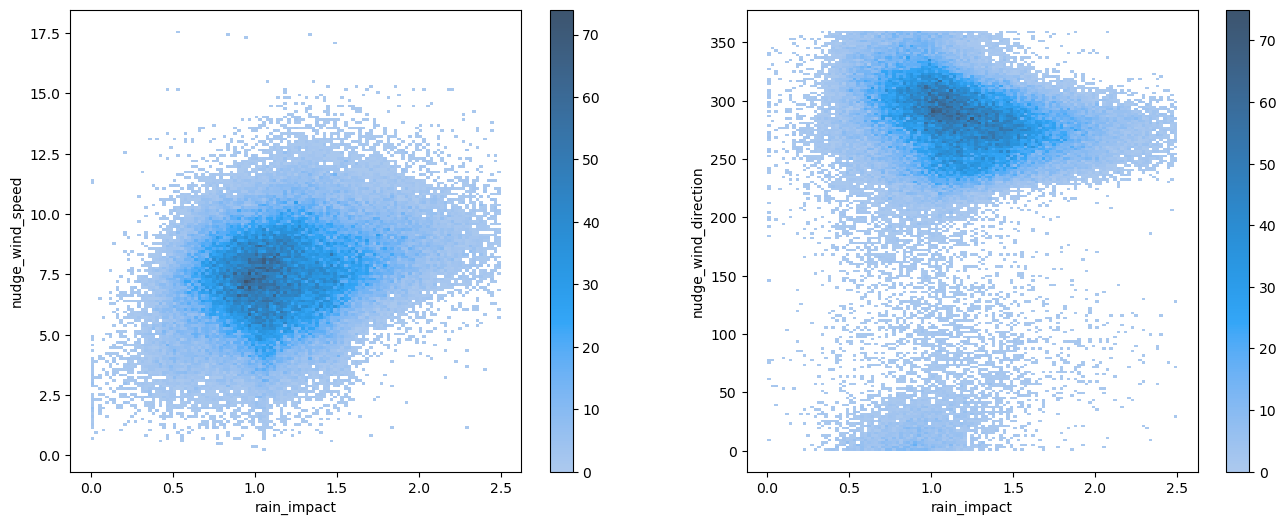

In [14]:
xlabel = 'rain_impact'
ylabel = 'nudge_wind_speed'


fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

xlabel = 'rain_impact'
ylabel = 'nudge_wind_direction'

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

[Text(0, 0, '13586'),
 Text(0, 0, '10053'),
 Text(0, 0, '10627'),
 Text(0, 0, '608')]

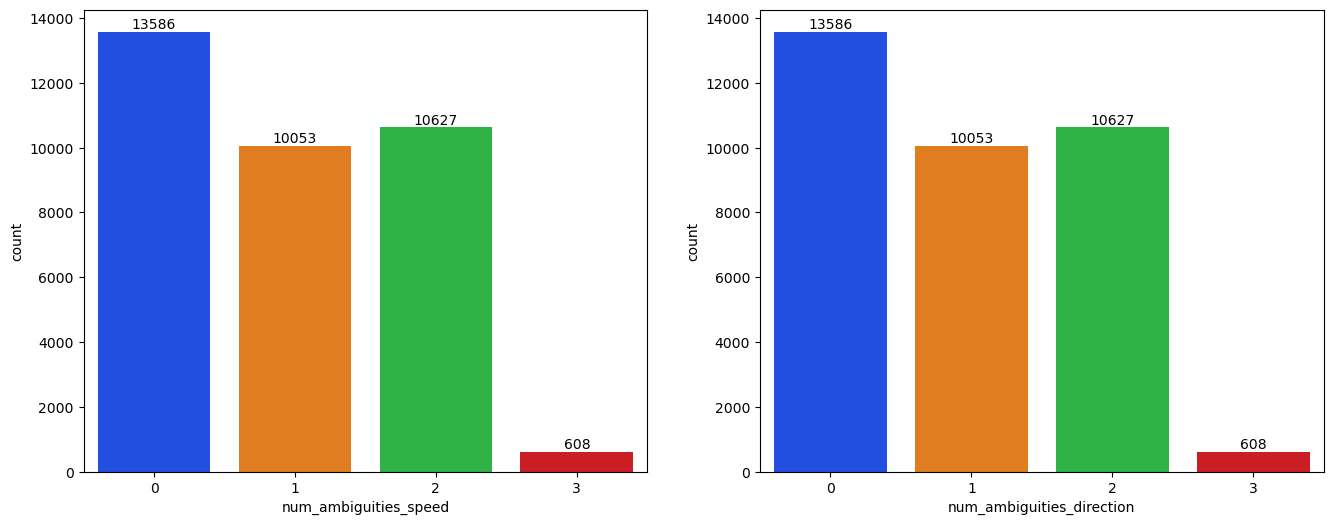

In [15]:
xlabel = f'Speed Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'
ylabel = f'Direction Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'


subDF = df.loc[df['label'] == -1]
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
#                 cbar = False,  hue='num_ambiguities_speed', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)

s = sns.countplot(subDF, x='num_ambiguities_speed',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])


ax = axes[1]
# s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
#                 cbar = False, hue='num_ambiguities_direction', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
s = sns.countplot(subDF, x='num_ambiguities_direction',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

[Text(0, 0, '47079'),
 Text(0, 0, '32500'),
 Text(0, 0, '33478'),
 Text(0, 0, '796')]

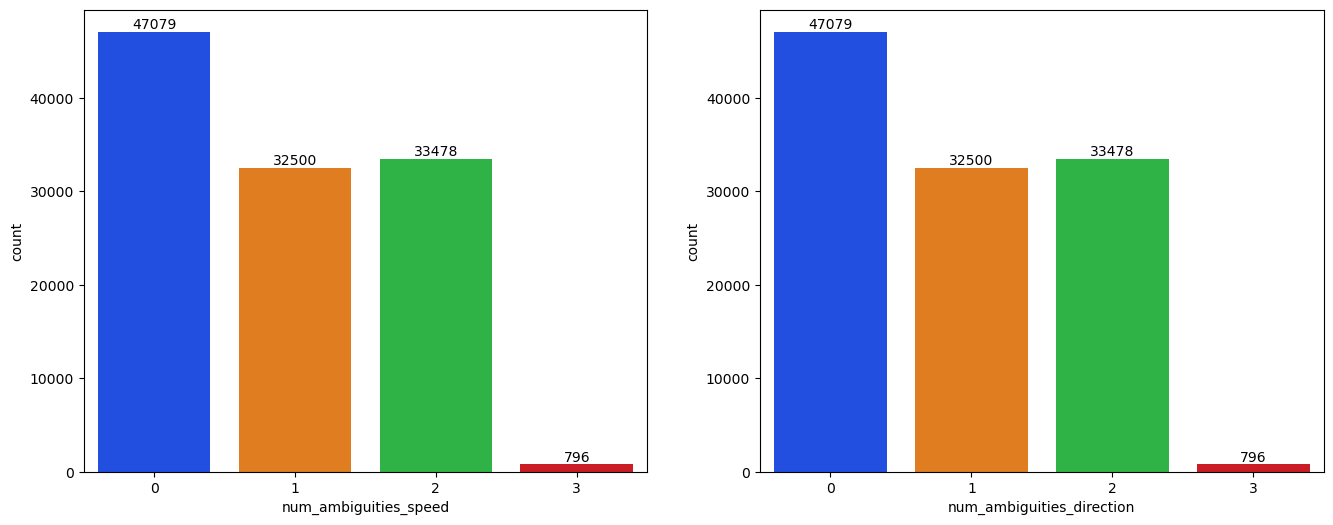

In [16]:
xlabel = f'Speed Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'
ylabel = f'Direction Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'


subDF = df.loc[df['label'] == 0]
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
#                 cbar = False,  hue='num_ambiguities_speed', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)

s = sns.countplot(subDF, x='num_ambiguities_speed',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])


ax = axes[1]
# s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
#                 cbar = False, hue='num_ambiguities_direction', common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"), ax = ax)
s = sns.countplot(subDF, x='num_ambiguities_direction',palette = sns.color_palette("bright"), ax = ax)
s.bar_label(s.containers[0])

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/529264752.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.opti

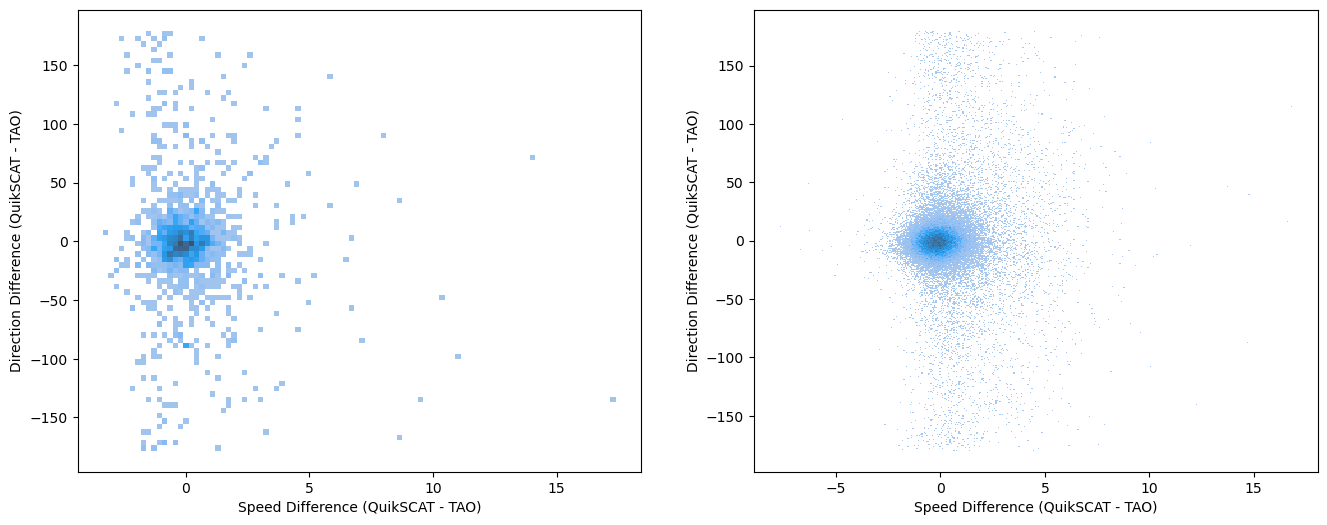

In [17]:
xlabel = f'Speed Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'
ylabel = f'Direction Difference (QuikSCAT - TAO)'# {timeWindow} min mean)'


subDF = df.loc[df['num_ambiguities_speed'] == 3 ]
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
                cbar = False,  #hue='num_ambiguities_speed', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

# s = sns.countplot(subDF, x='num_ambiguities_speed',palette = sns.color_palette("bright"), ax = ax)
# s.bar_label(s.containers[0])


subDF = df.loc[df['num_ambiguities_speed'] == 2 ]
ax = axes[1]
s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
                cbar = False, #hue='num_ambiguities_direction', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)
# s = sns.countplot(subDF, x='num_ambiguities_direction',palette = sns.color_palette("bright"), ax = ax)
# s.bar_label(s.containers[0])

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

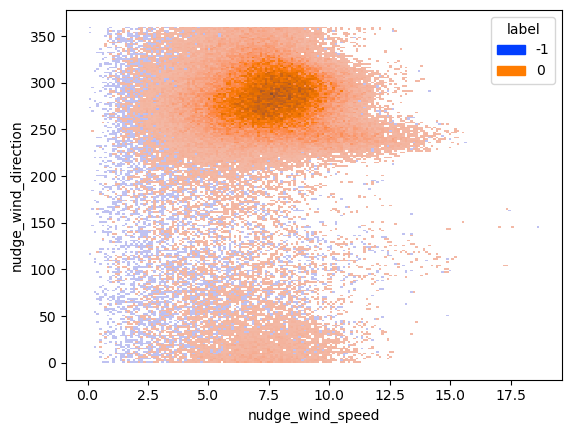

In [18]:
xlabel = 'nudge_wind_speed'
ylabel = 'nudge_wind_direction'

s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                hue='label', #common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"))

In [19]:
# xlabel = 'nudge_wind_speed'
# ylabel = 'nudge_wind_direction'

# s = sns.kdeplot(df, x=xlabel, y = ylabel,levels=10, 
#                 hue='label', #common_norm=True, #cbar = True,
#                 palette = sns.color_palette("bright"))

/tmp/ipykernel_1451034/264342740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/264342740.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = s

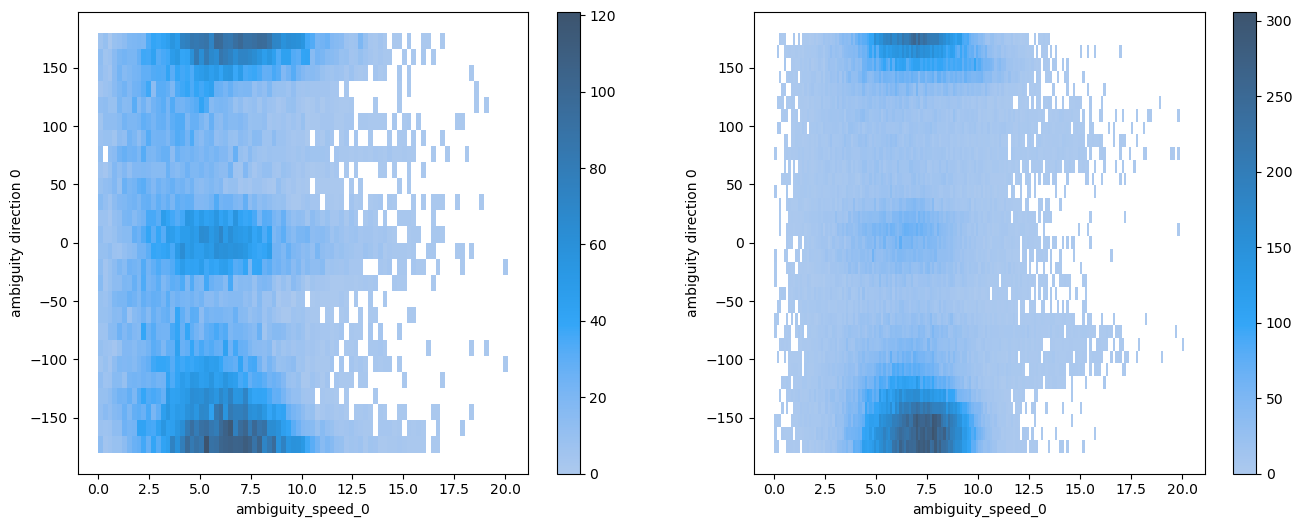

In [20]:
df['ambiguity direction 0'] = (df['ambiguity_direction_0'] -90 +360)%360
dummy = df['ambiguity direction 0']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['ambiguity direction 0'] = dummy

xlabel = 'ambiguity_speed_0'
ylabel = 'ambiguity direction 0'
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/tmp/ipykernel_1451034/1546368750.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/1546368750.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s =

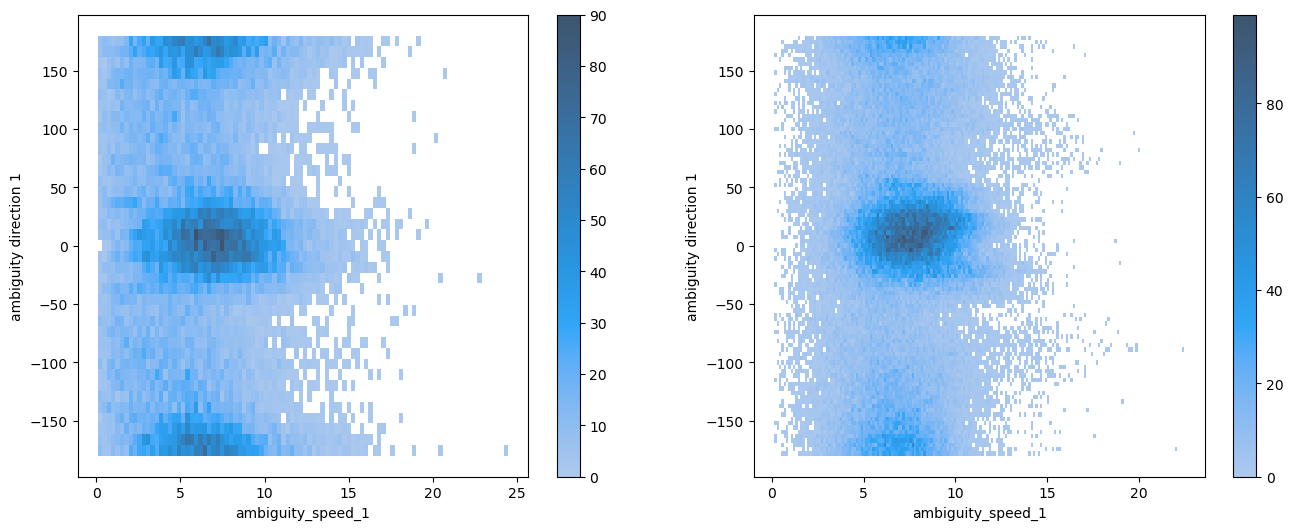

In [21]:
df['ambiguity direction 1'] = (df['ambiguity_direction_1'] -90 +360)%360
dummy = df['ambiguity direction 1']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['ambiguity direction 1'] = dummy

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

xlabel = 'ambiguity_speed_1'
ylabel = 'ambiguity direction 1'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/tmp/ipykernel_1451034/741125140.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/741125140.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = s

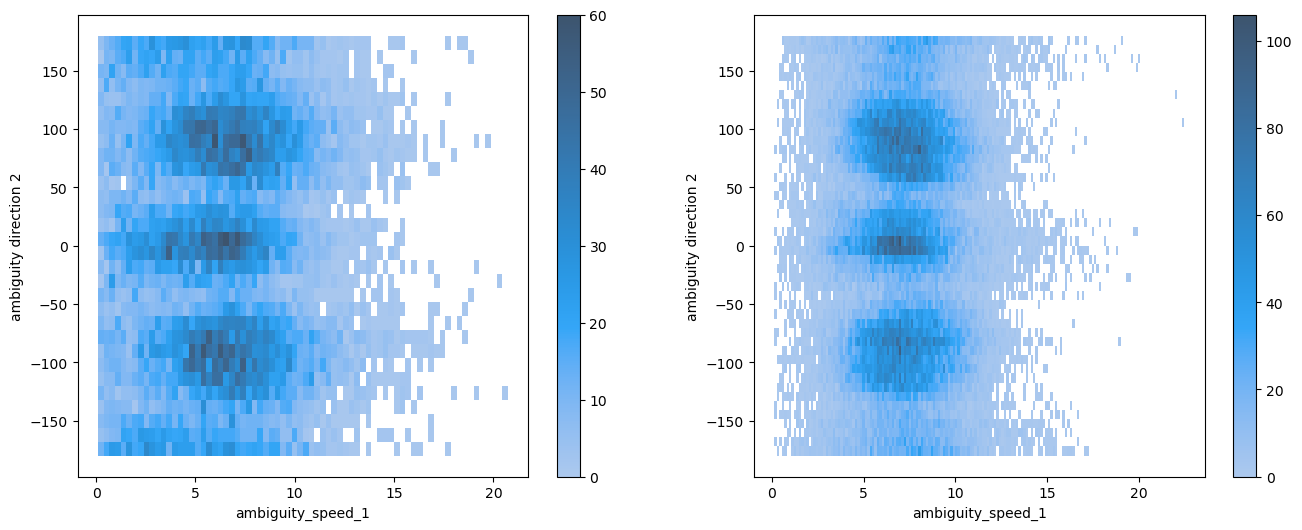

In [22]:
df['ambiguity direction 2'] = (df['ambiguity_direction_2'] -90 +360)%360
dummy = df['ambiguity direction 2']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['ambiguity direction 2'] = dummy

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

xlabel = 'ambiguity_speed_1'
ylabel = 'ambiguity direction 2'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/tmp/ipykernel_1451034/3883007613.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dummy[mmask] = dummy[mmask] - 360
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/3883007613.py:13: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s =

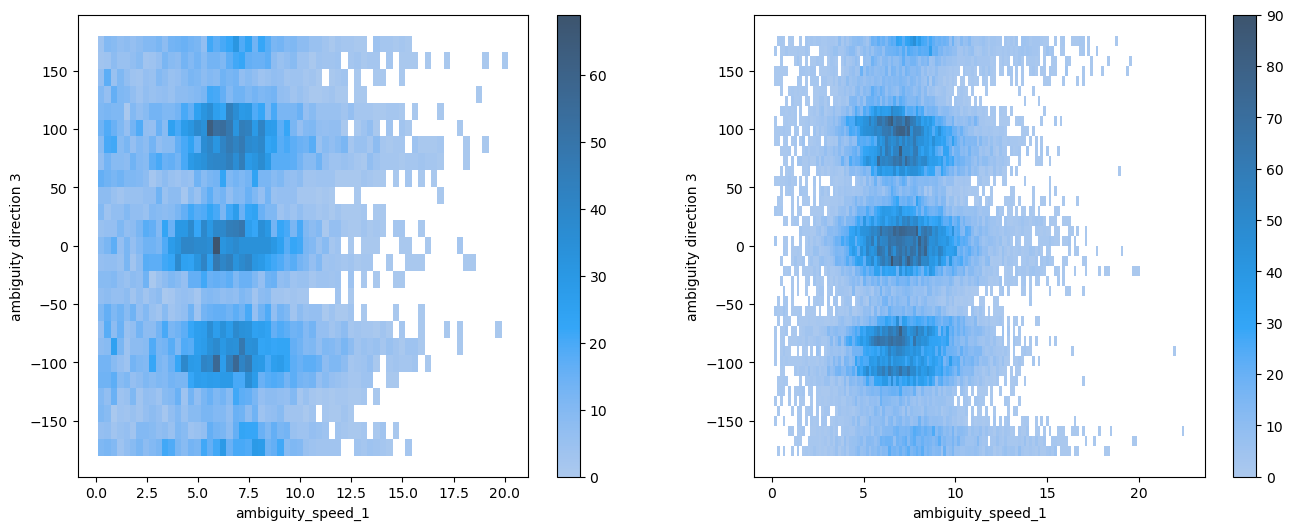

In [23]:
df['ambiguity direction 3'] = (df['ambiguity_direction_3'] -90 +360)%360
dummy = df['ambiguity direction 3']
mmask = dummy >180
dummy[mmask] = dummy[mmask] - 360
df['ambiguity direction 3'] = dummy

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

xlabel = 'ambiguity_speed_1'
ylabel = 'ambiguity direction 3'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/3398762657.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

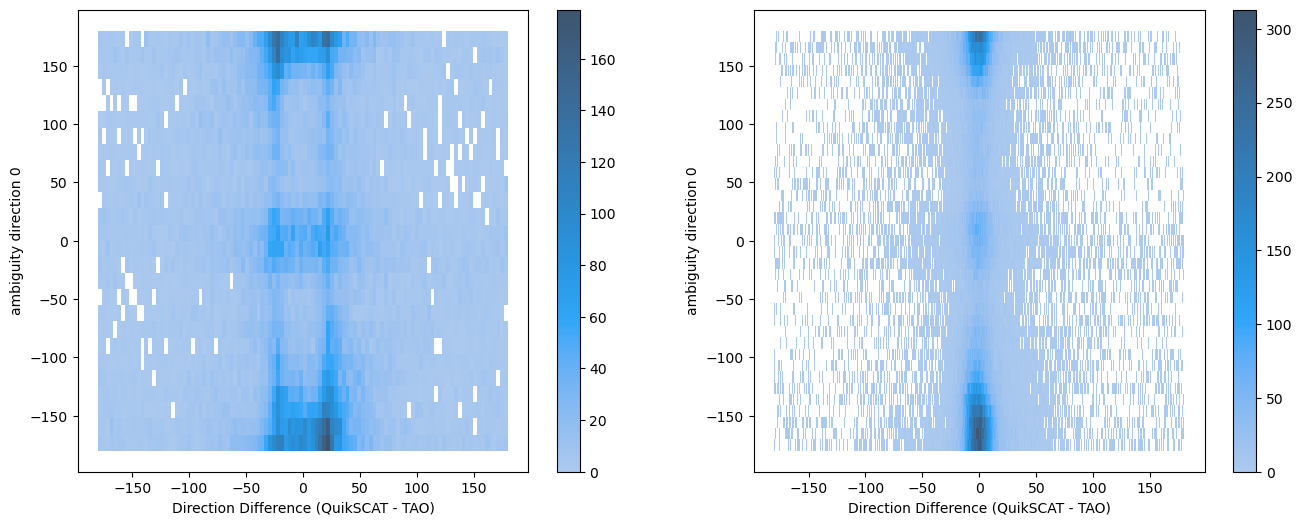

In [24]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

xlabel = 'Direction Difference (QuikSCAT - TAO)'
ylabel = 'ambiguity direction 0'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/1617801225.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

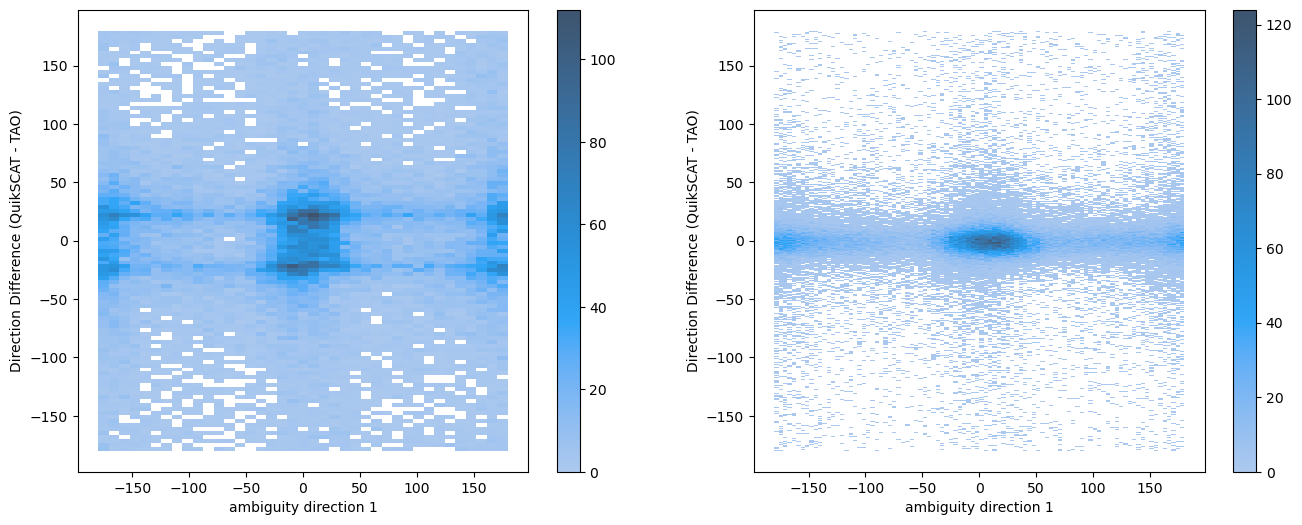

In [25]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ylabel = 'Direction Difference (QuikSCAT - TAO)'
xlabel = 'ambiguity direction 1'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/2523300828.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

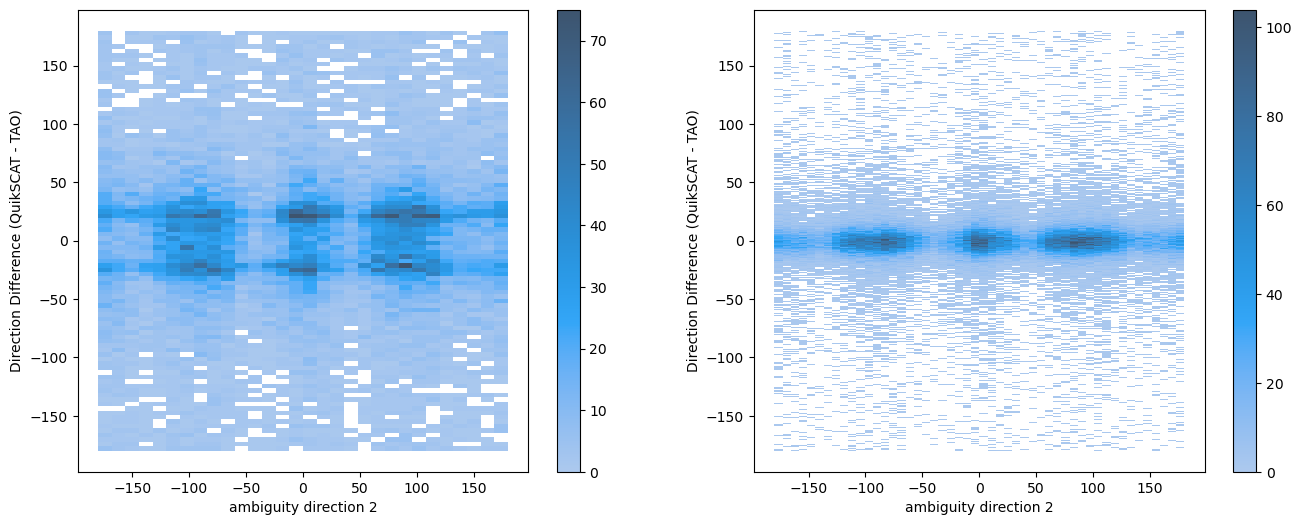

In [26]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ylabel = 'Direction Difference (QuikSCAT - TAO)'
xlabel = 'ambiguity direction 2'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/1622164733.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

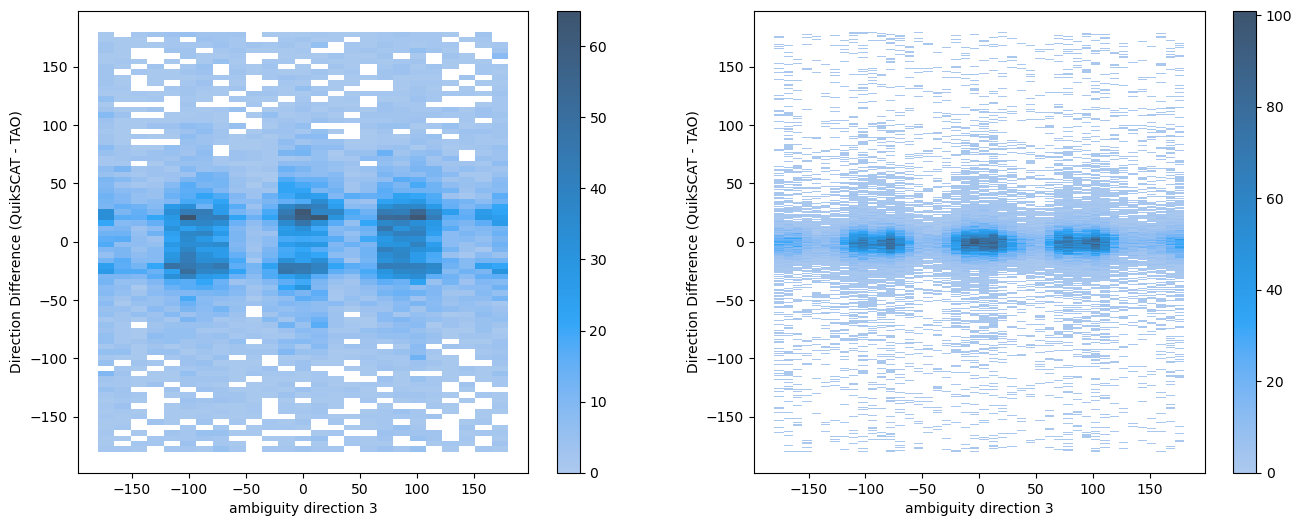

In [27]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ylabel = 'Direction Difference (QuikSCAT - TAO)'
xlabel = 'ambiguity direction 3'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/658289594.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

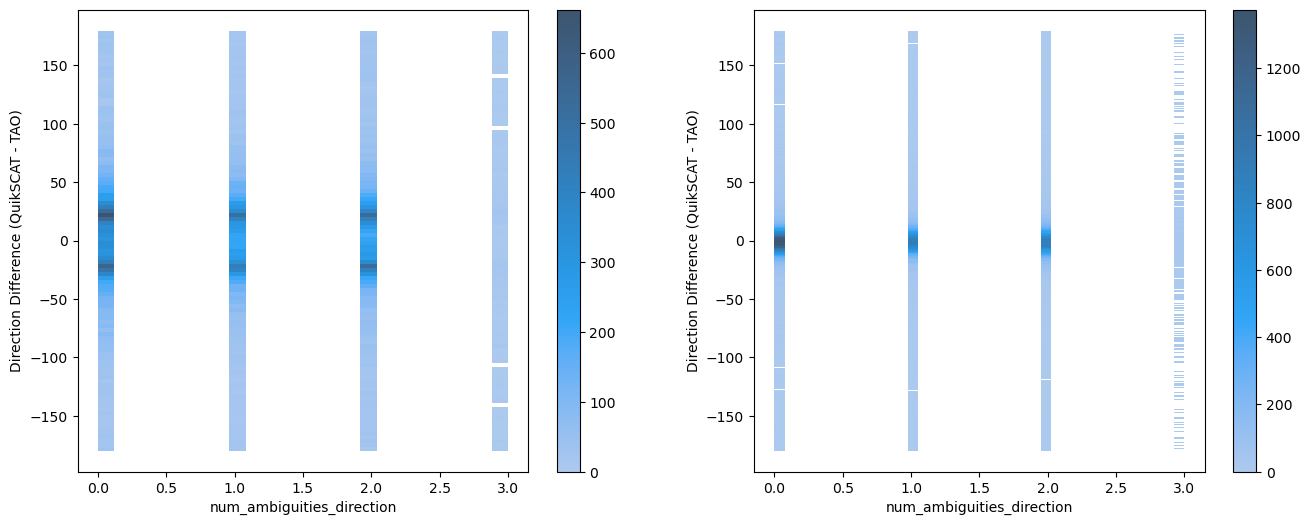

In [28]:
fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ylabel = 'Direction Difference (QuikSCAT - TAO)'
xlabel = 'num_ambiguities_direction'

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                palette = sns.color_palette("bright"), ax = ax)

ax = axes[1]
s = sns.histplot(df, x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

Text(0.1, 0.95, 'O')

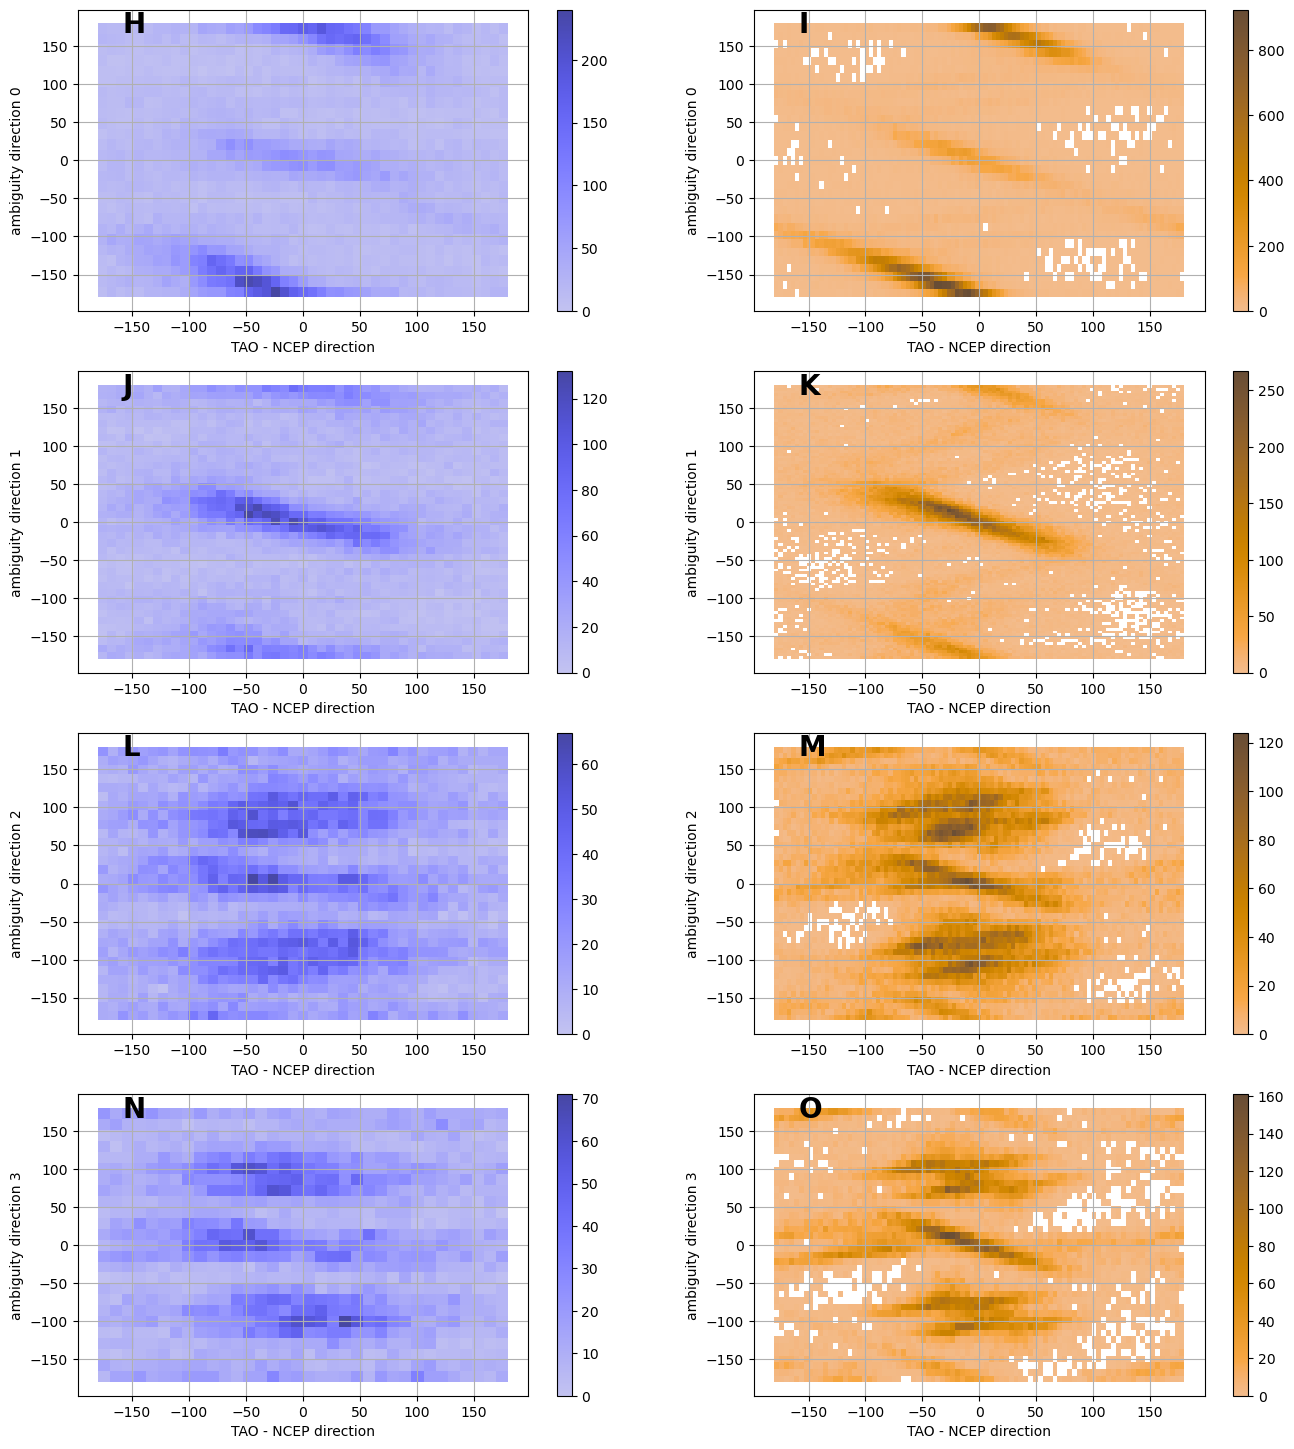

In [29]:
fig,  axes = plt.subplots(nrows =4, ncols = 2, figsize=(16,18))
from matplotlib.colors import LogNorm

xlabel = 'TAO - NCEP direction'
#xlabel = 'Direction Difference (QuikSCAT - TAO)'
ylabel = 'ambiguity direction 0'

ax = axes[0, 0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='blue',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'H', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)



ax = axes[0, 1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='orange',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'I', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)



#xlabel = 'TAO direcDiff with NCEP'
ylabel = 'ambiguity direction 1'

ax = axes[1, 0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='blue',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'J', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


ax = axes[1, 1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='orange',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'K', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#xlabel = 'TAO direcDiff with NCEP'
ylabel = 'ambiguity direction 2'

ax = axes[2, 0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='blue',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'L', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax = axes[2, 1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='orange',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'M', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

#xlabel = 'TAO direcDiff with NCEP'
ylabel = 'ambiguity direction 3'

ax = axes[3, 0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='blue',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'N', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

ax = axes[3, 1]
s = sns.histplot(df.loc[df['label'] == 0], x=xlabel, y = ylabel,#levels=10, 
                cbar = True, #hue='label', common_norm=True, 
                color ='orange',# palette = sns.color_palette("bright")[1],
                 ax = ax)
ax.grid()
ax.text(0.1, 0.95, 'O', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

In [30]:
ds

<xarray.Dataset>
Dimensions:                                                         (
                                                                     count: 148727)
Coordinates:
  * count                                                           (count) int64 ...
Data variables: (12/258)
    Wind Direction (TAO)                                            (count) float32 ...
    WDIR_QC                                                         (count) float32 ...
    WDIR_DM                                                         (count) |S1 ...
    Wind Speed (TAO)                                                (count) float32 ...
    WSPD_QC                                                         (count) float32 ...
    WSPD_DM                                                         (count) |S1 ...
    ...                                                              ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 110 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 110 min mean)  (count) float64 ...
    Speed Difference (QuikSCAT - TAO 120 min mean)                  (count) float64 ...
    Direction Difference (QuikSCAT - TAO 120 min mean)              (count) float64 ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 120 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 120 min mean)  (count) float64 ...

In [31]:
df['SST - AIRT (TAO)'] = df['Sea Surface Temperature (TAO)'] - df['Air Temperature (TAO)']

mask = abs(df['TAO - NCEP direction']) >50
#df['NCEP direction diff.'] = 'large'

dummy = np.array([ 0 for i in range(len(df))])
print(len(dummy))
dummy[mask] = 1
df['num biases'] = dummy

mask = abs(df['SST - AIRT (TAO)']) > 1
#df['NCEP direction diff.'] = 'large'

dummy = np.array([ 0 for i in range(len(df))])
print(len(dummy))
dummy[mask] = 1
df['num biases'] = df['num biases'] + dummy


mask = abs(df['Zonal Neutral Wind Speed (TAO)']) < 2
#df['NCEP direction diff.'] = 'large'

dummy = np.array([ 0 for i in range(len(df))])
print(len(dummy))
dummy[mask] = 1
df['num biases'] = df['num biases'] + dummy


mask = abs(df['Relative Humidity (TAO)']) > 90
#df['NCEP direction diff.'] = 'large'

dummy = np.array([ 0 for i in range(len(df))])
print(len(dummy))
dummy[mask] = 1
df['num biases'] = df['num biases'] + dummy

148727
148727
148727
148727


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/1547340873.py:2: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.hist

([<matplotlib.axis.XTick at 0x7f9a5b1b2510>,
 [Text(-0.75, 0, 'bad matchups'), Text(-0.25, 0, 'good matchups')])

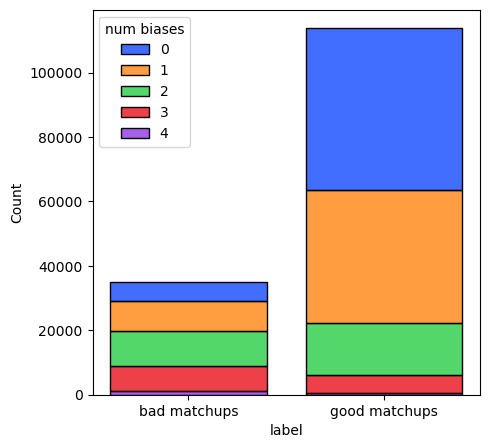

In [32]:
fig, ax = plt.subplots(figsize=(5,5))
sns.histplot(df, x='label', hue='num biases', multiple='stack', palette = sns.color_palette("bright"), shrink=0.8, bins=2, ax = ax)
new_labels = ['bad matchups', 'good matchups']
#ax.set_xticklabels
plt.xticks([-0.75, -0.25], new_labels)

In [33]:
# df_plot = df.groupby([num biases, 'label']).size().reset_index().pivot(columns=num biases, index='label', values=0)
# df_plot
# #sns.countplot( x='label',hue=num biases, data=df_plot)

In [34]:
# # Features to use for classification
# features = ['mean WSPD_10N 120min', 'mean_SST', 'mean_AIRT', 'mean_RELH', 'std_WSPD', 'std_cosWDIR', 'std_sinWDIR', 'std_SST', 'std_AIRT', 'std_RELH']

# # Split the dataset into features (X) and target (y)
# X = data[features]

# y_pred = classifier.predict(X)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_1451034/2256456675.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10,
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating in

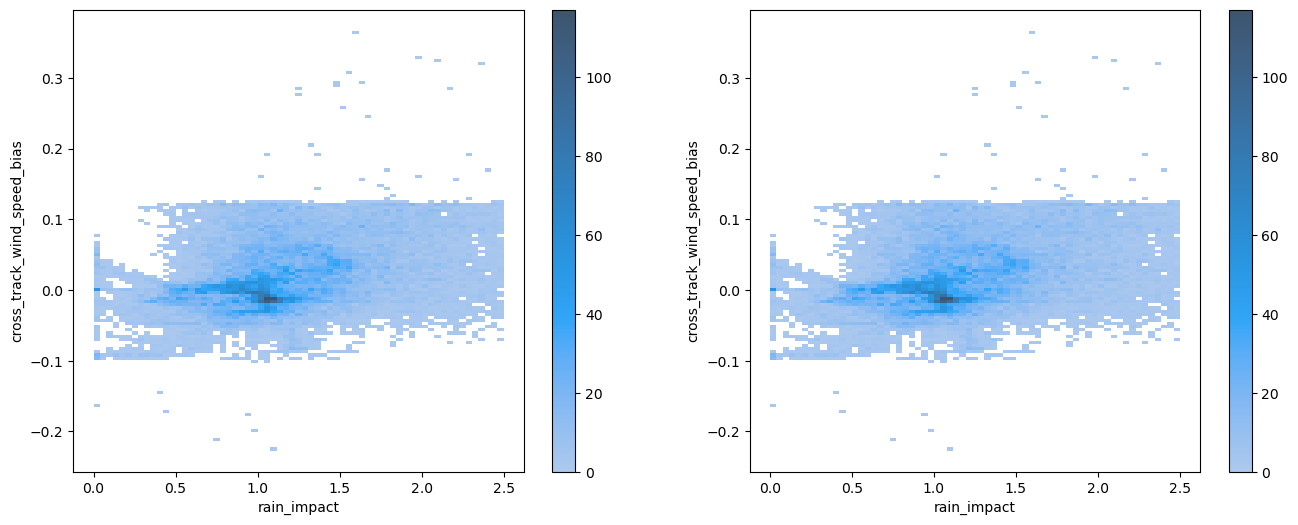

In [35]:
#'cross_track_wind_speed_bias',
xlabel = 'rain_impact'
ylabel = 'cross_track_wind_speed_bias'


fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

xlabel = 'rain_impact'
ylabel = 'cross_track_wind_speed_bias'

ax = axes[1]
s = sns.histplot(df.loc[df['label'] == -1], x=xlabel, y = ylabel,#levels=10, 
                cbar = True,#hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

In [36]:
df['SST - AIRT (TAO)'] = df['Sea Surface Temperature (TAO)'] - df['Air Temperature (TAO)']

In [37]:
goodBad = np.array(['good' for i in range(len(df))])
print(len(goodBad))
mask = df['label'].isin([-1])
goodBad[mask] = 'bad'
df['GoodBad'] = goodBad

148727


In [38]:
def getGoodBad(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:    
        goodCount = len(subDF.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        badCount = len(subDF.loc[subDF['GoodBad'] == 'bad'])/len(subDF)*100
        return f' {goodCount:3.0f},{badCount:3.0f}'
    else:
        return ''

def getBadPercent(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    
    if isPresent:
        goodCount = len(subDF.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        badCount = len(subDF.loc[subDF['GoodBad'] == 'bad'])/len(subDF)*100
        
        return badCount
    else:
        return -999

def getCount(lat, lon, df):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        count = len(subDF) #.loc[subDF['GoodBad'] == 'good'])/len(subDF)*100
        return count
    else:
        return -999


def getSpeedCorrelation(lat, lon, df, timeWindow=10):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Neutral Wind Speed at 10m (TAO)'
        else:
            TAOlabel = f'mean WSPD_10N {timeWindow}min'
        QSspeed = subDF['Wind Speed (QuikSCAT)'].to_numpy()
        TAOspeed = subDF[TAOlabel].to_numpy()
        corr = np.corrcoef(QSspeed, TAOspeed)[0,1]
        return corr
    else:
        return -999

def getDirCorrelation(lat, lon, df, timeWindow=10):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Wind Direction (TAO)'
        else:
            TAOlabel = f'mean WDIR {timeWindow}min'
        QSdir = subDF['Wind Direction (QuikSCAT)'].to_numpy()
        TAOdir = subDF[TAOlabel].to_numpy()
        corr = np.corrcoef(QSdir, TAOdir)[0,1]
        return corr
    else:
        return -999

def getXSpeedCorrelation(lat, lon, df, timeWindow=10):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
    if isPresent:
        if timeWindow == 10:
            TAOlabel = 'Zonal Wind Speed (TAO)'
        else:
            TAOlabel = f'mean Ux_10N {timeWindow}min'
        QSspeed_x = subDF['Zonal Wind Speed (QuikSCAT)']
        TAOspeed_x = subDF[TAOlabel]
        corr = np.corrcoef(QSspeed_x, TAOspeed_x)[0,1]
        return corr
    else:
        return -999

def getYSpeedCorrelation(lat, lon, df, timeWindow=10):
    isPresent = False
    lon = (lon + 360)%360
    subDF = df.loc[df['LATITUDE'] == lat]
    subDF = subDF.loc[subDF['LONGITUDE'] == lon]
    if len(subDF) > 0:
        isPresent = True
        if timeWindow == 10:
            TAOlabel = 'Meridional Wind Speed (TAO)'
        else:
            TAOlabel = f'mean Vy_10N {timeWindow}min'
    if isPresent:
        QSspeed_y = subDF['Meridional Wind Speed (QuikSCAT)']
        TAOspeed_y = subDF[TAOlabel]
        corr = np.corrcoef(QSspeed_y, TAOspeed_y)[0,1]
        return corr
    else:
        return -999



    

In [39]:
latList = [-9, -8, -5, -2, 0, 2, 5, 8, 9]
lonList = [-95, -110, -125, -140, -155, -170, -180, 165]

ylen = len(latList)
xlen = len(lonList)

taskList = []

for latId  in range(ylen):
    for lonId in range(xlen):
        taskList.append([latList[latId], lonList[lonId]])

ntasks = len(taskList)

twindow = np.arange(10,130,10)
ntime = len(twindow)

wspd_corr = np.zeros((ntasks, ntime), dtype=float)
wdir_corr = np.zeros((ntasks, ntime), dtype=float)

ux_corr = np.zeros((ntasks, ntime), dtype=float)
vy_corr = np.zeros((ntasks, ntime), dtype=float)

for tskid in range(ntasks):
    task = taskList[tskid]
    lat = task[0]
    lon = task[1]
    for tymid in range(ntime):
        wspd_corr[tskid, tymid] = getSpeedCorrelation(lat, lon, df, timeWindow=twindow[tymid])
        wdir_corr[tskid, tymid] = getDirCorrelation(lat, lon, df, timeWindow=twindow[tymid])
        ux_corr[tskid, tymid] = getXSpeedCorrelation(lat, lon, df, timeWindow=twindow[tymid])
        vy_corr[tskid, tymid] = getYSpeedCorrelation(lat, lon, df, timeWindow=twindow[tymid])
    
    
    

In [40]:
wspd_corr[wspd_corr == -999] = np.nan
wdir_corr[wdir_corr == -999] = np.nan
ux_corr[ux_corr == -999] = np.nan
vy_corr[vy_corr == -999] = np.nan

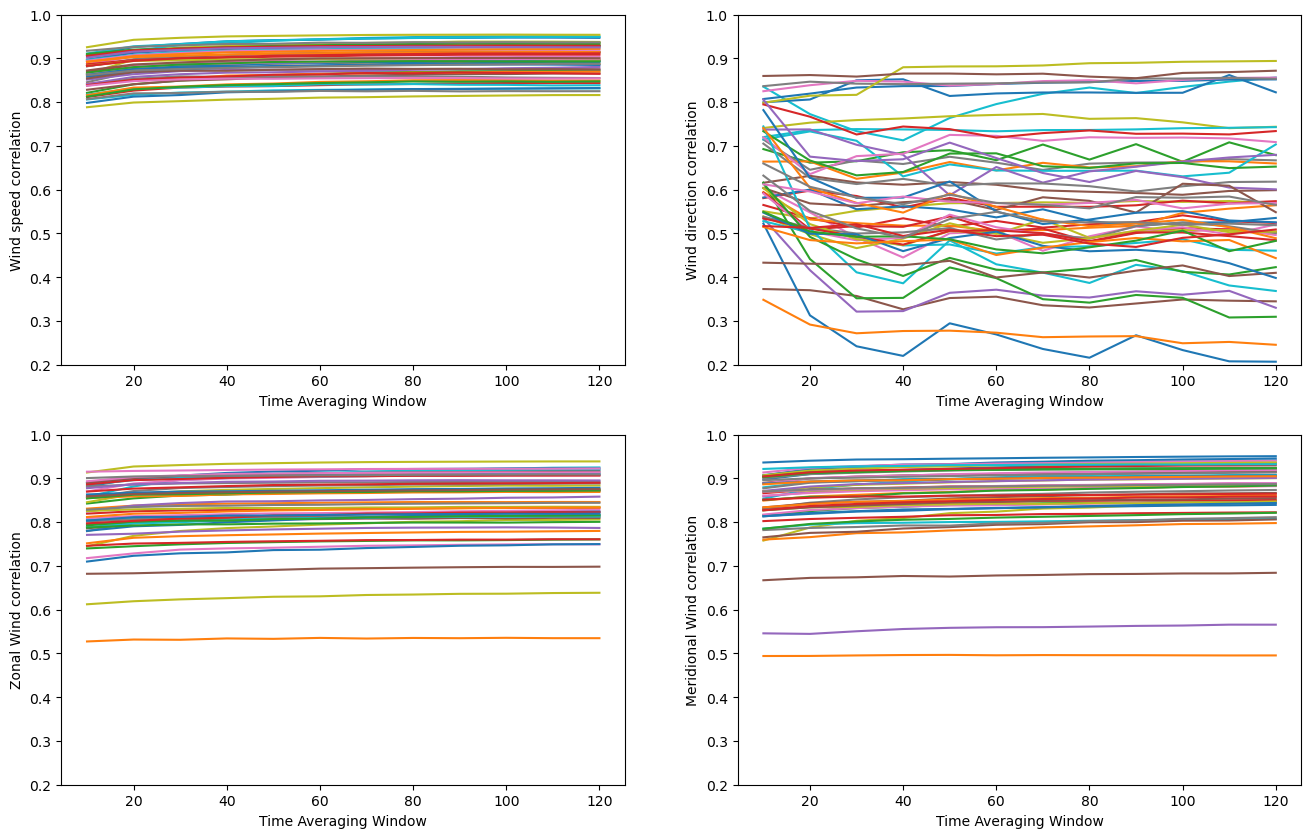

In [41]:
fig, axes = plt.subplots(nrows =2, ncols=2, figsize=(16,10))
for tskid in range(ntasks):
    ax = axes[0,0]
    ax.plot(twindow, wspd_corr[tskid,:], label=f'{tskid}')
    ax.set_ylabel('Wind speed correlation')
    ax.set_xlabel('Time Averaging Window')
    ax.set_ylim(0.2,1)

    ax = axes[0,1]
    ax.plot(twindow, wdir_corr[tskid,:], label=f'{tskid}')
    ax.set_ylabel('Wind direction correlation')
    ax.set_xlabel('Time Averaging Window')
    ax.set_ylim(0.2,1)

    ax = axes[1,0]
    ax.plot(twindow, ux_corr[tskid,:], label=f'{tskid}')
    ax.set_ylabel('Zonal Wind correlation')
    ax.set_xlabel('Time Averaging Window')
    ax.set_ylim(0.2,1)

    ax = axes[1,1]
    ax.plot(twindow, vy_corr[tskid,:], label=f'{tskid}')
    ax.set_ylabel('Meridional Wind correlation')
    ax.set_xlabel('Time Averaging Window')
    ax.set_ylim(0.2,1)

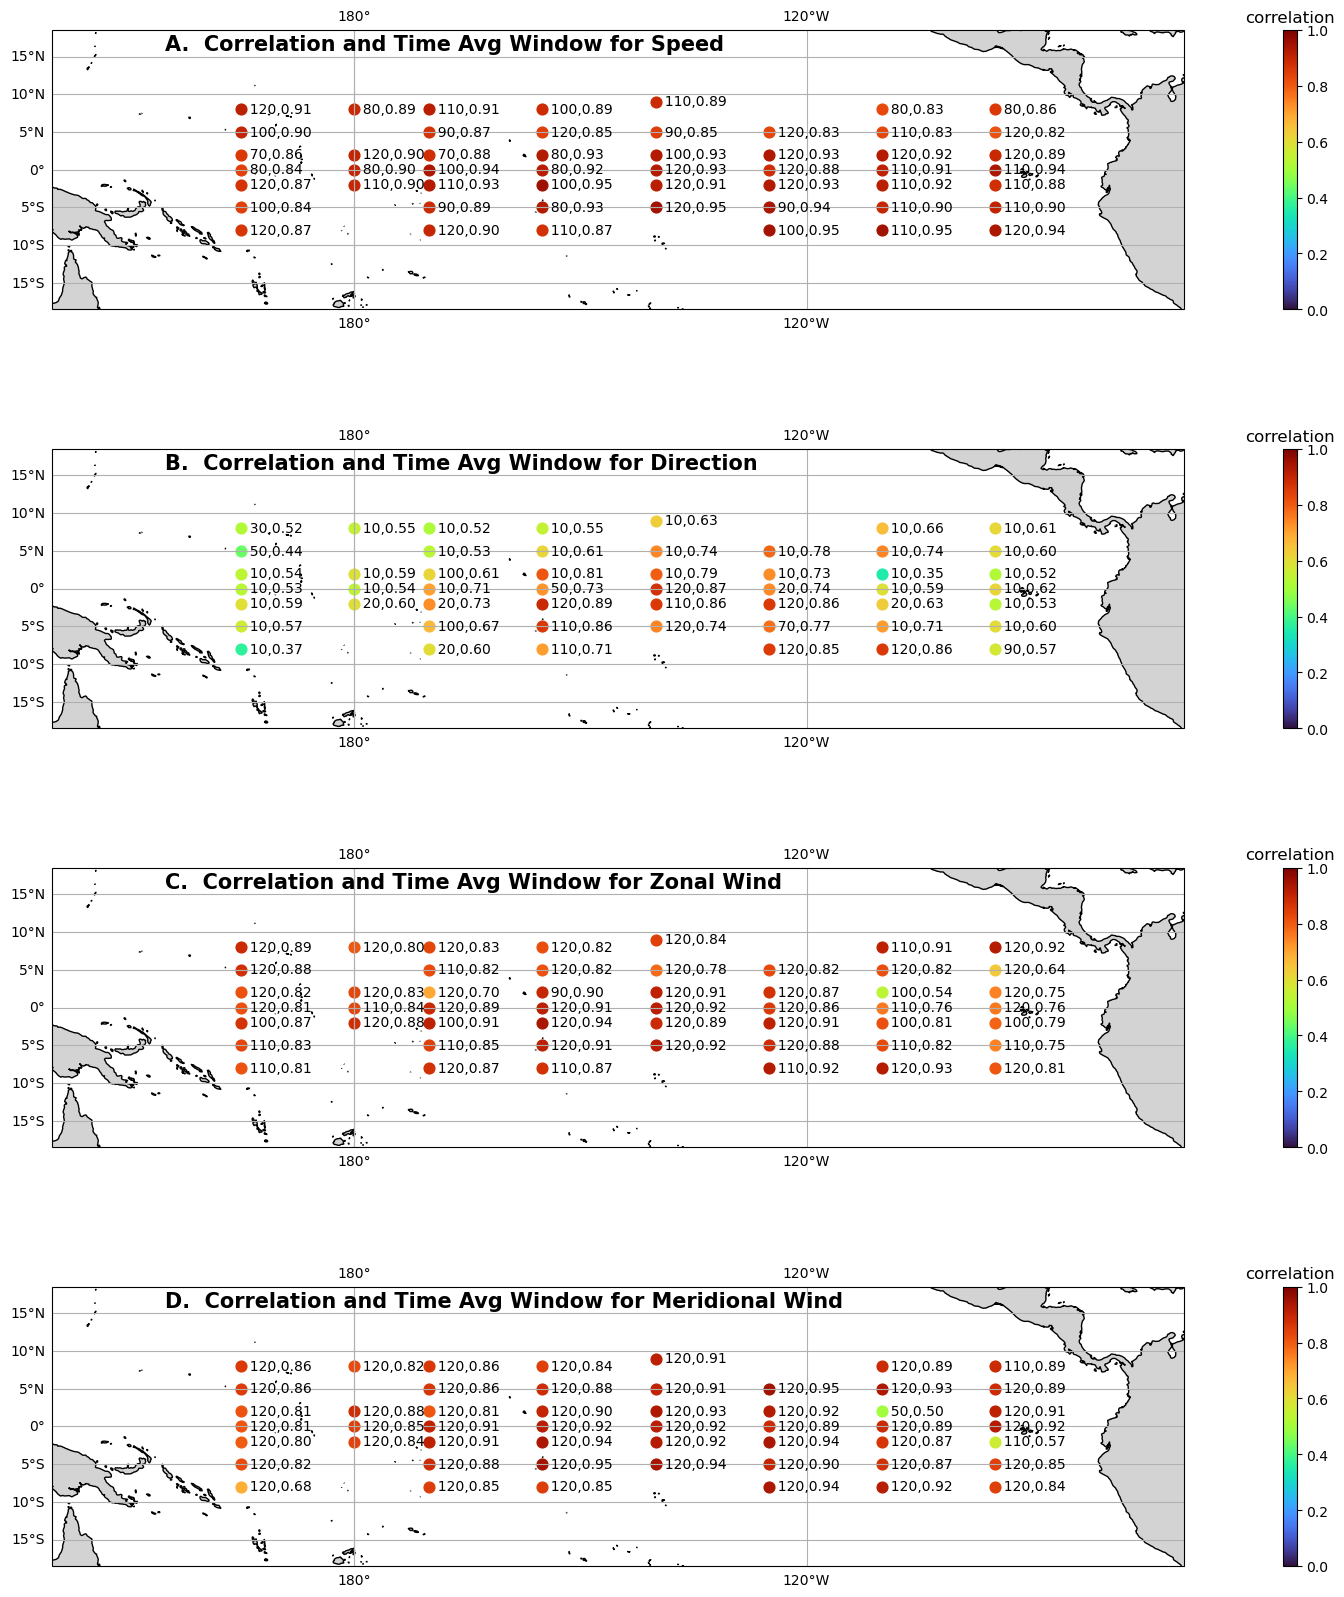

In [42]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
fig, axes = plt.subplots(nrows = 4, 
                       ncols = 1, 
                        figsize = (20,16),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, # "aspect": 1.2}, #1.2},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)

ax = axes[0] 

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(wspd_corr[tid,:])
    timeWindow = twindow[indx]
    corr = wspd_corr[tid,indx]    
    txt = f'  {timeWindow},{corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if ~np.isnan(corr): 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'A.  Correlation and Time Avg Window for Speed', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################
ax = axes[1]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(wdir_corr[tid,:])
    timeWindow = twindow[indx]
    corr = wdir_corr[tid,indx]    
    txt = f'  {timeWindow},{corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if ~np.isnan(corr): 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'B.  Correlation and Time Avg Window for Direction', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


###################################################################################################################
ax = axes[2]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(ux_corr[tid,:])
    timeWindow = twindow[indx]
    corr = ux_corr[tid,indx]    
    txt = f'  {timeWindow},{corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if ~np.isnan(corr): 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'C.  Correlation and Time Avg Window for Zonal Wind', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################
ax = axes[3]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(vy_corr[tid,:])
    timeWindow = twindow[indx]
    corr = vy_corr[tid,indx]    
    txt = f'  {timeWindow},{corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if ~np.isnan(corr): 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'D.  Correlation and Time Avg Window for Meridional Wind', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.subplots_adjust(left = 0.01, right = 1, top =0.98 , bottom = 0.02, wspace=0 , hspace=0)
#plt.tight_layout()

#plt.savefig('goodVsBad.png', dpi=100)


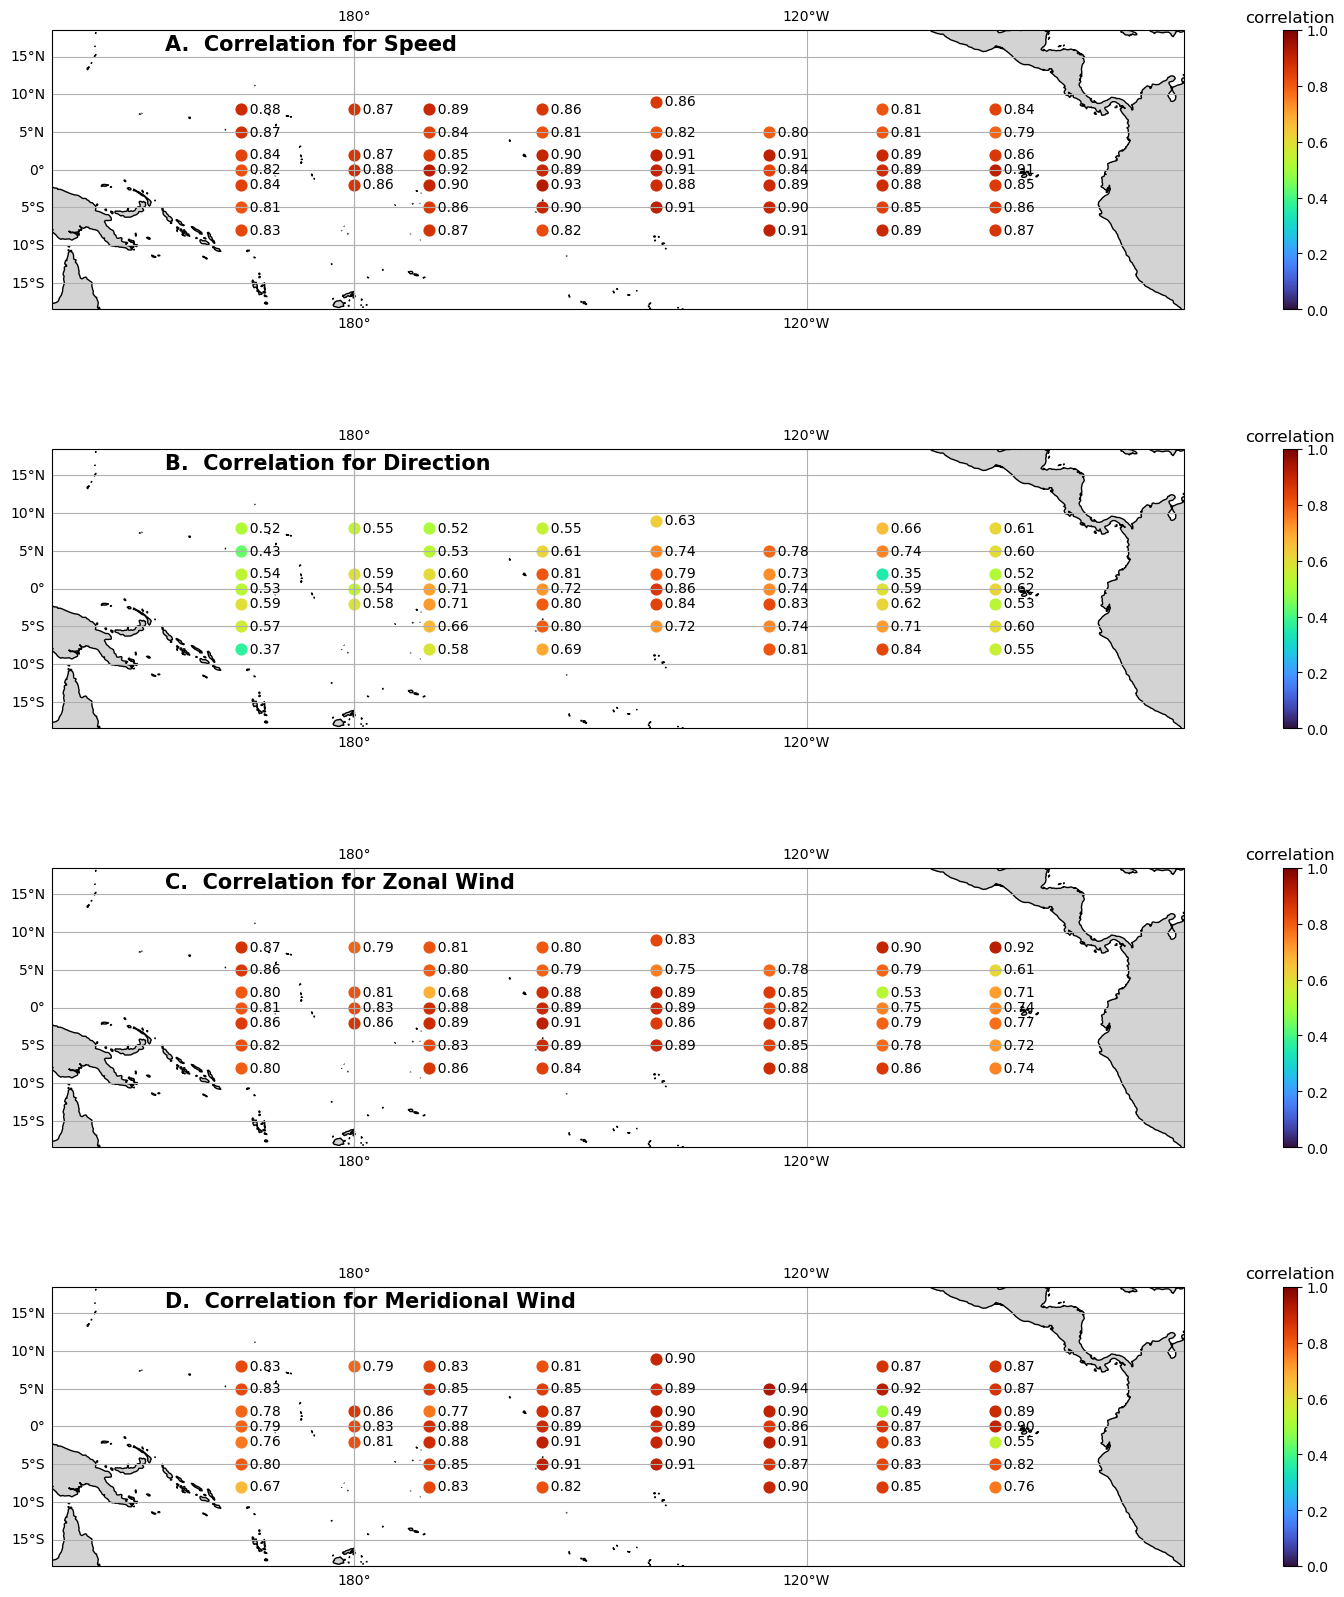

In [43]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
fig, axes = plt.subplots(nrows = 4, 
                       ncols = 1, 
                        figsize = (20,16),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, # "aspect": 1.2}, #1.2},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)

ax = axes[0] 

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(wspd_corr[tid,:])
    timeWindow = twindow[indx]
    corr = getSpeedCorrelation(lat, lon, df, timeWindow=10)
    txt = f'  {corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if corr !=-999: 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'A.  Correlation for Speed', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################
ax = axes[1]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(wdir_corr[tid,:])
    timeWindow = twindow[indx]
    corr = getDirCorrelation(lat, lon, df, timeWindow=10)
    txt = f'  {corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if corr !=-999:  
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'B.  Correlation for Direction', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


###################################################################################################################
ax = axes[2]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(ux_corr[tid,:])
    timeWindow = twindow[indx]
    corr = getXSpeedCorrelation(lat, lon, df, timeWindow=10)  
    txt = f'  {corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if corr != -999: 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'C.  Correlation for Zonal Wind', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################
ax = axes[3]

ax.add_feature(land)


ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for tid in range(ntasks):
    task = taskList[tid]
    lat = task[0]
    lon = task[1]
    indx = np.argmax(vy_corr[tid,:])
    timeWindow = twindow[indx]
    corr = getYSpeedCorrelation(lat, lon, df, timeWindow=10)  
    txt = f'  {corr:3.2f}'
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    if corr != -999: 
        ax.text(xpos, lat-0.5, txt)
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('correlation')
#ax.scatter(df['LONGITUDE'], df['LATITUDE'], transform=ccrs.PlateCarree())

ax.text(0.1, 0.95, 'D.  Correlation for Meridional Wind', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.subplots_adjust(left = 0.01, right = 1, top =0.98 , bottom = 0.02, wspace=0 , hspace=0)
#plt.tight_layout()

#plt.savefig('goodVsBad.png', dpi=100)


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: xlabel='Wind Direction (TAO)', ylabel='Wind Direction (QuikSCAT)'>

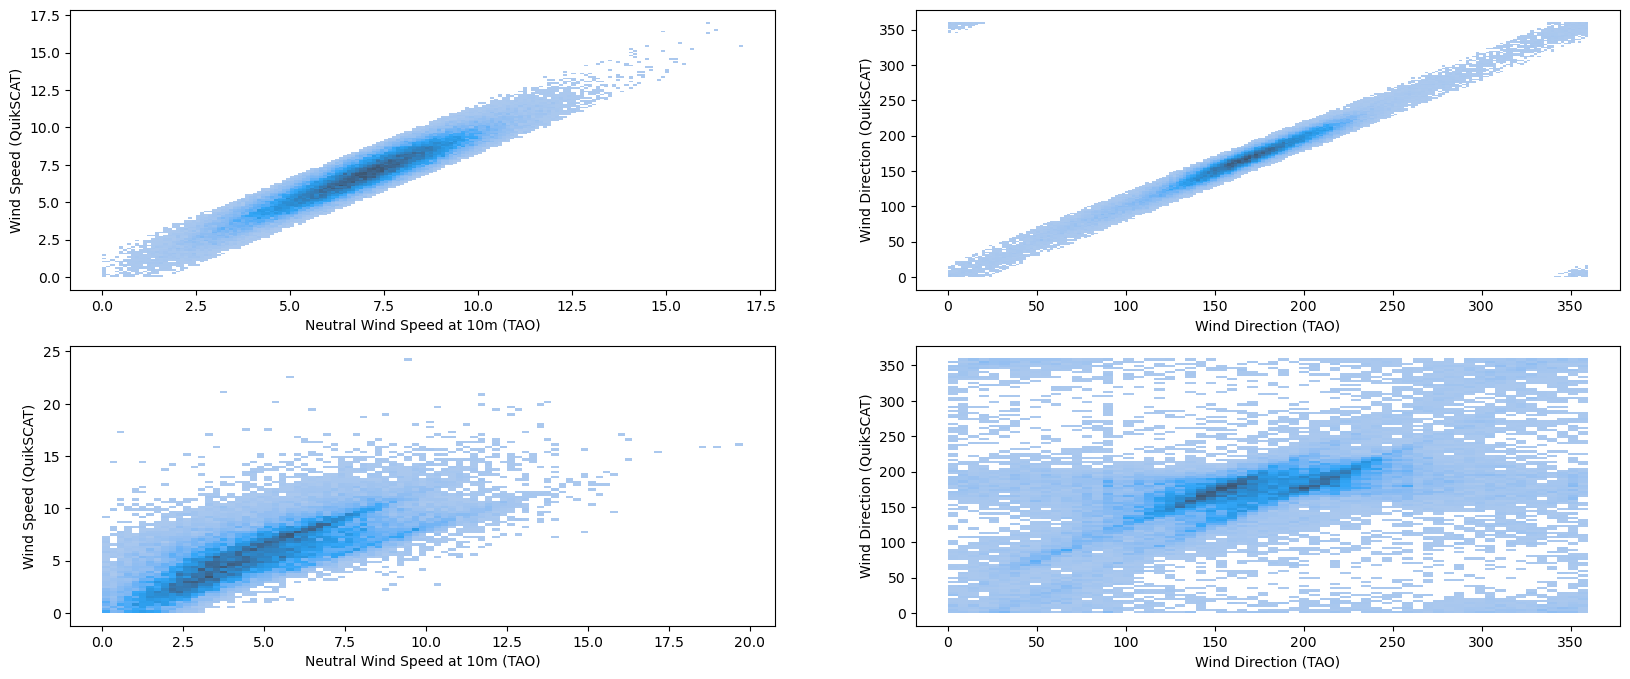

In [44]:
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(20,8))

subDF = df.loc[df['GoodBad'] == 'good']
ax = axes[0,0]
xlabel = 'Neutral Wind Speed at 10m (TAO)'
ylabel = 'Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


ax = axes[0,1]
xlabel = 'Wind Direction (TAO)'
ylabel = 'Wind Direction (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


subDF = df.loc[df['GoodBad'] == 'bad']
ax = axes[1,0]
xlabel = 'Neutral Wind Speed at 10m (TAO)'
ylabel = 'Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


ax = axes[1,1]
xlabel = 'Wind Direction (TAO)'
ylabel = 'Wind Direction (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

<Axes: xlabel='Meridional Neutral Wind Speed (TAO)', ylabel='Meridional Wind Speed (QuikSCAT)'>

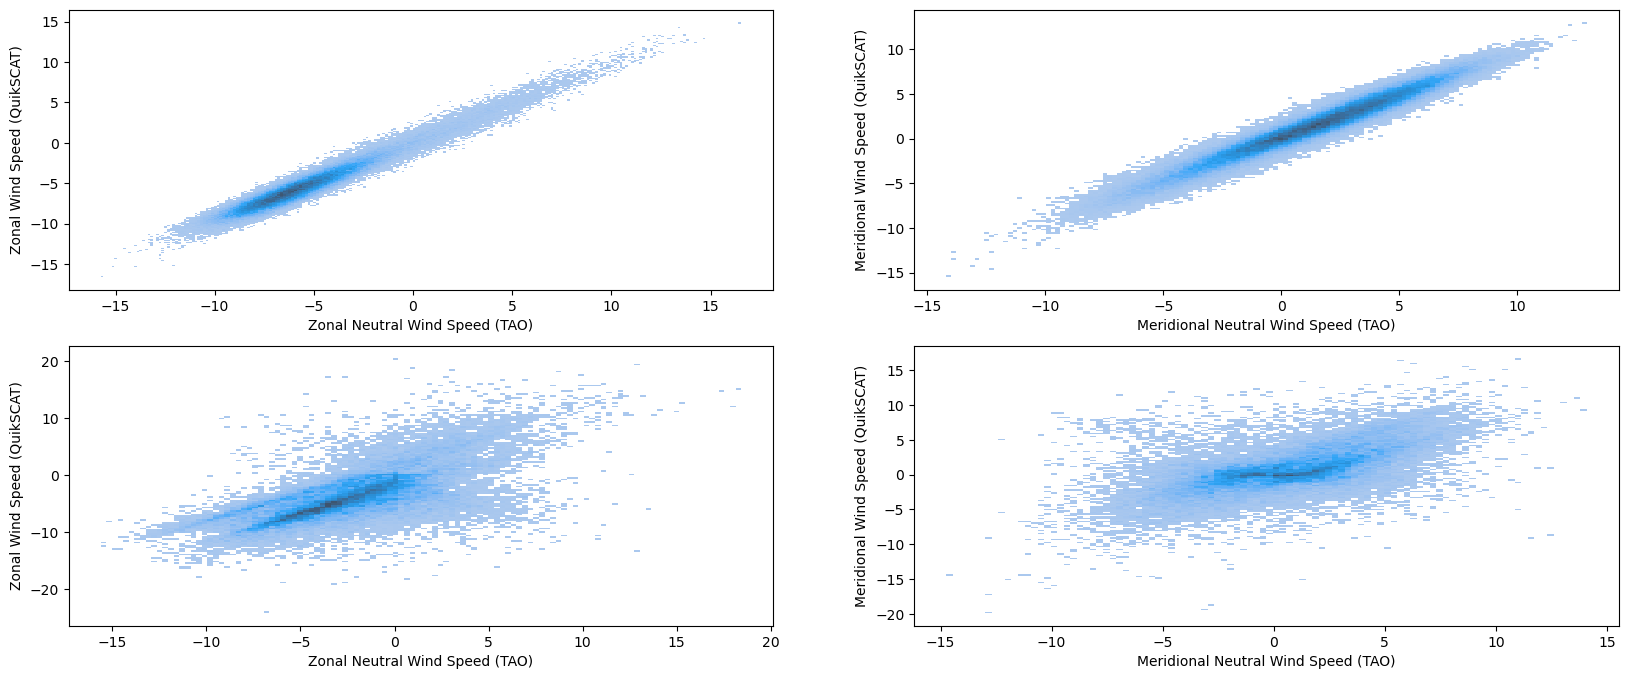

In [45]:
fig, axes = plt.subplots(nrows=2 , ncols=2, figsize=(20,8))

subDF = df.loc[df['GoodBad'] == 'good']
ax = axes[0,0]
xlabel = 'Zonal Neutral Wind Speed (TAO)'
ylabel = 'Zonal Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


ax = axes[0,1]
xlabel = 'Meridional Neutral Wind Speed (TAO)'
ylabel = 'Meridional Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


subDF = df.loc[df['GoodBad'] == 'bad']
ax = axes[1,0]
xlabel = 'Zonal Neutral Wind Speed (TAO)'
ylabel = 'Zonal Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


ax = axes[1,1]
xlabel = 'Meridional Neutral Wind Speed (TAO)'
ylabel = 'Meridional Wind Speed (QuikSCAT)'
sns.histplot(subDF, x = xlabel, y = ylabel, ax = ax)


Text(0.1, 0.95, 'D.  Wind Direction Correlation for Bad Matchups')

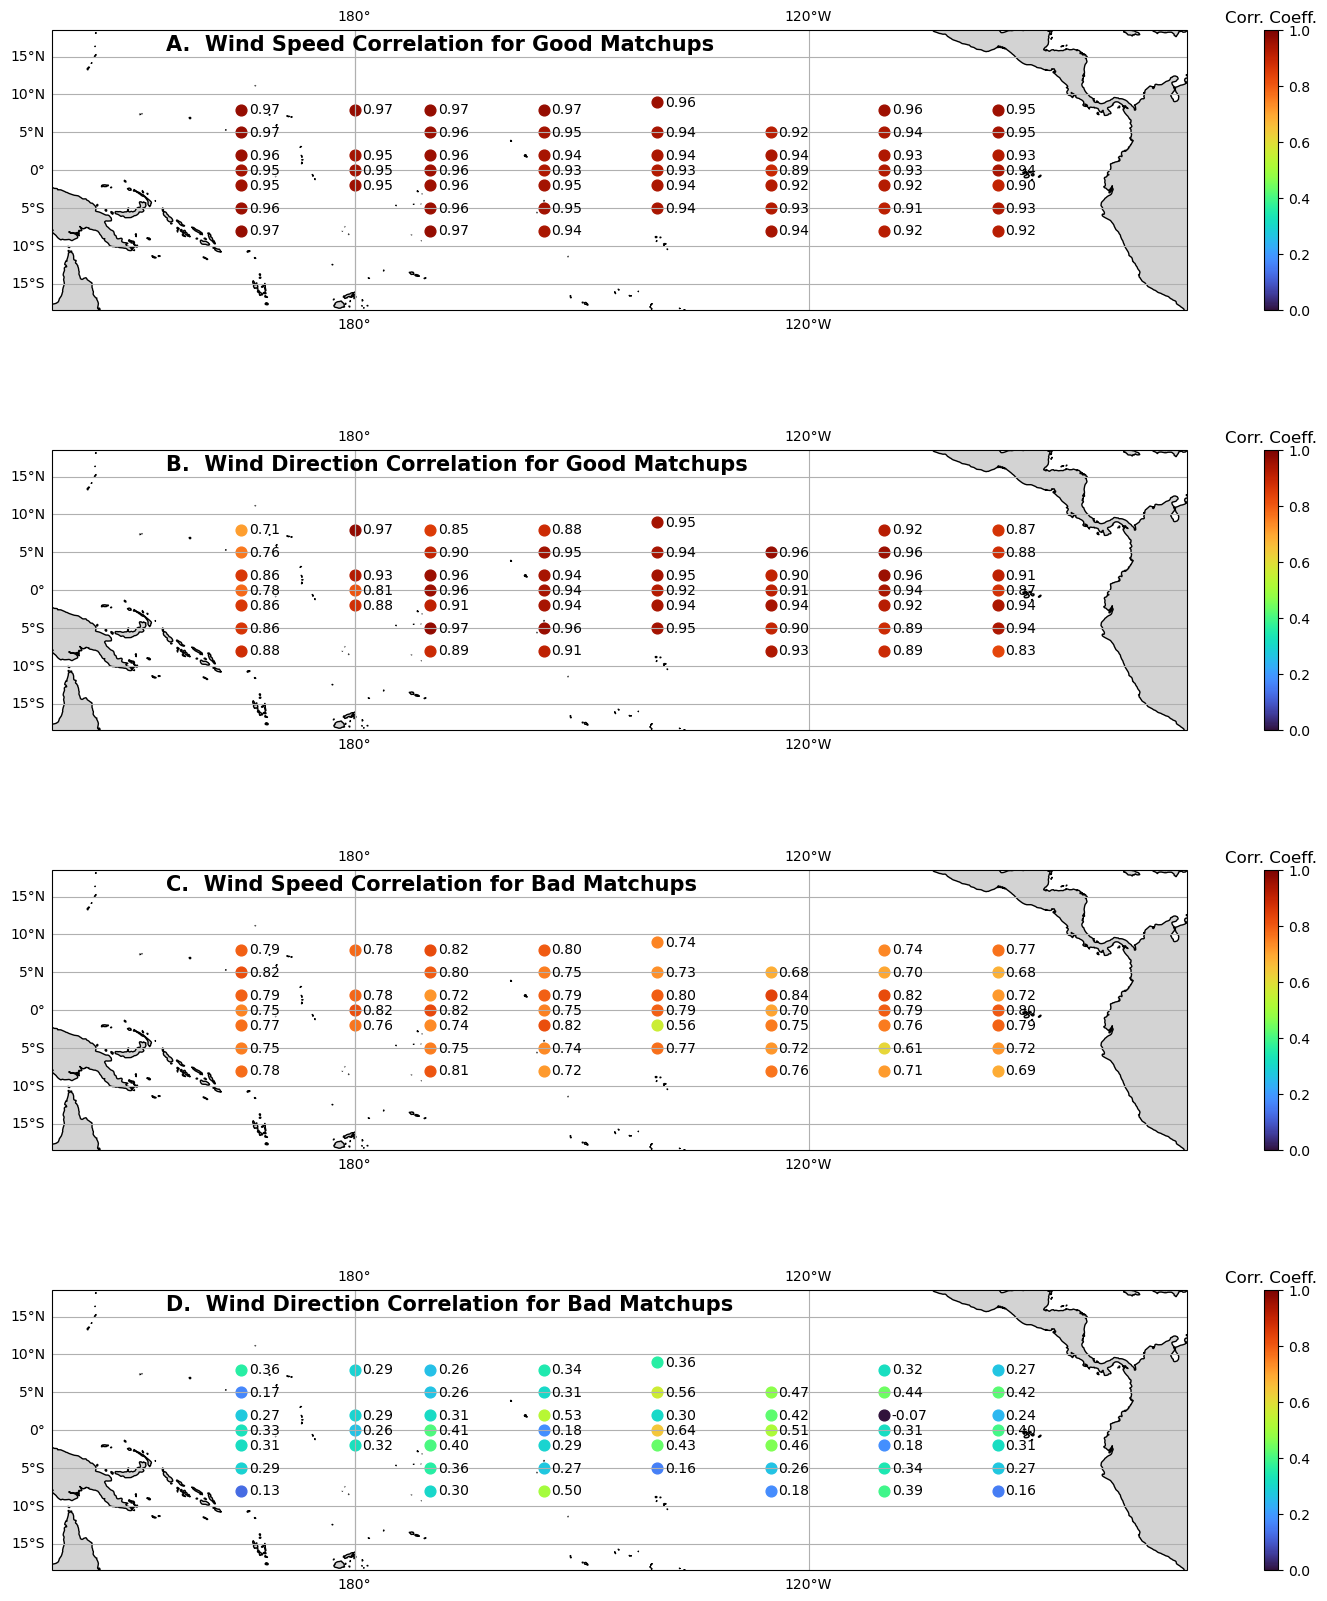

In [46]:
fig, axes = plt.subplots(nrows = 4, 
                       ncols = 1, 
                        figsize = (20,20),
                       subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, # "aspect": 1.2}, #1.2},
                       gridspec_kw = {'wspace':0.2, 'hspace':0.5}) 

land = cfeature.NaturalEarthFeature(
    category='physical',
    name='land',
    scale='50m',
    facecolor='lightgrey'  # Set the color to grey
)


subDF = df.loc[df['GoodBad'] =='good']
ax = axes[0] 
ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedCorrelation(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1, lat-0.5, f'{corr:4.2f}')
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('Corr. Coeff.')

ax.text(0.1, 0.95, 'A.  Wind Speed Correlation for Good Matchups', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



###################################################################################################################

ax = axes[1]
ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for task in taskList:
    lat = task[0]
    lon = task[1]
    txt = getGoodBad(lat, lon, df)
    

    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1, lat-0.5, f'{corr:4.2f}')
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('Corr. Coeff.')

ax.text(0.1, 0.95, 'B.  Wind Direction Correlation for Good Matchups', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################
subDF = df.loc[df['GoodBad'] =='bad']
ax = axes[2] 
ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for task in taskList:
    lat = task[0]
    lon = task[1]
    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getSpeedCorrelation(lat, lon, subDF)
    if corr != -999: 
        ax.text(xpos+1, lat-0.5, f'{corr:4.2f}')
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('Corr. Coeff.')

ax.text(0.1, 0.95, 'C.  Wind Speed Correlation for Bad Matchups', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



###################################################################################################################
ax = axes[3]
ax.add_feature(land)

ax.set_extent([140, -70, -5, 5]) 
gridlines = ax.gridlines(draw_labels=True)
ax.coastlines()
for task in taskList:
    lat = task[0]
    lon = task[1]
    txt = getGoodBad(lat, lon, df)
    

    xpos = lon + 180
    
    if xpos > 180:
       xpos -= 360
    corr = getDirCorrelation(lat, lon, subDF)
    #print(corr)
    if corr != -999: 
        ax.text(xpos+1, lat-0.5, f'{corr:4.2f}')
        x = ax.scatter(xpos, lat, c=corr, vmin=0, vmax=1, s=60, cmap=cm.turbo)
    
cb = plt.colorbar(x, ax = ax)
cb.ax.set_title('Corr. Coeff.')

ax.text(0.1, 0.95, 'D.  Wind Direction Correlation for Bad Matchups', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

###################################################################################################################

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

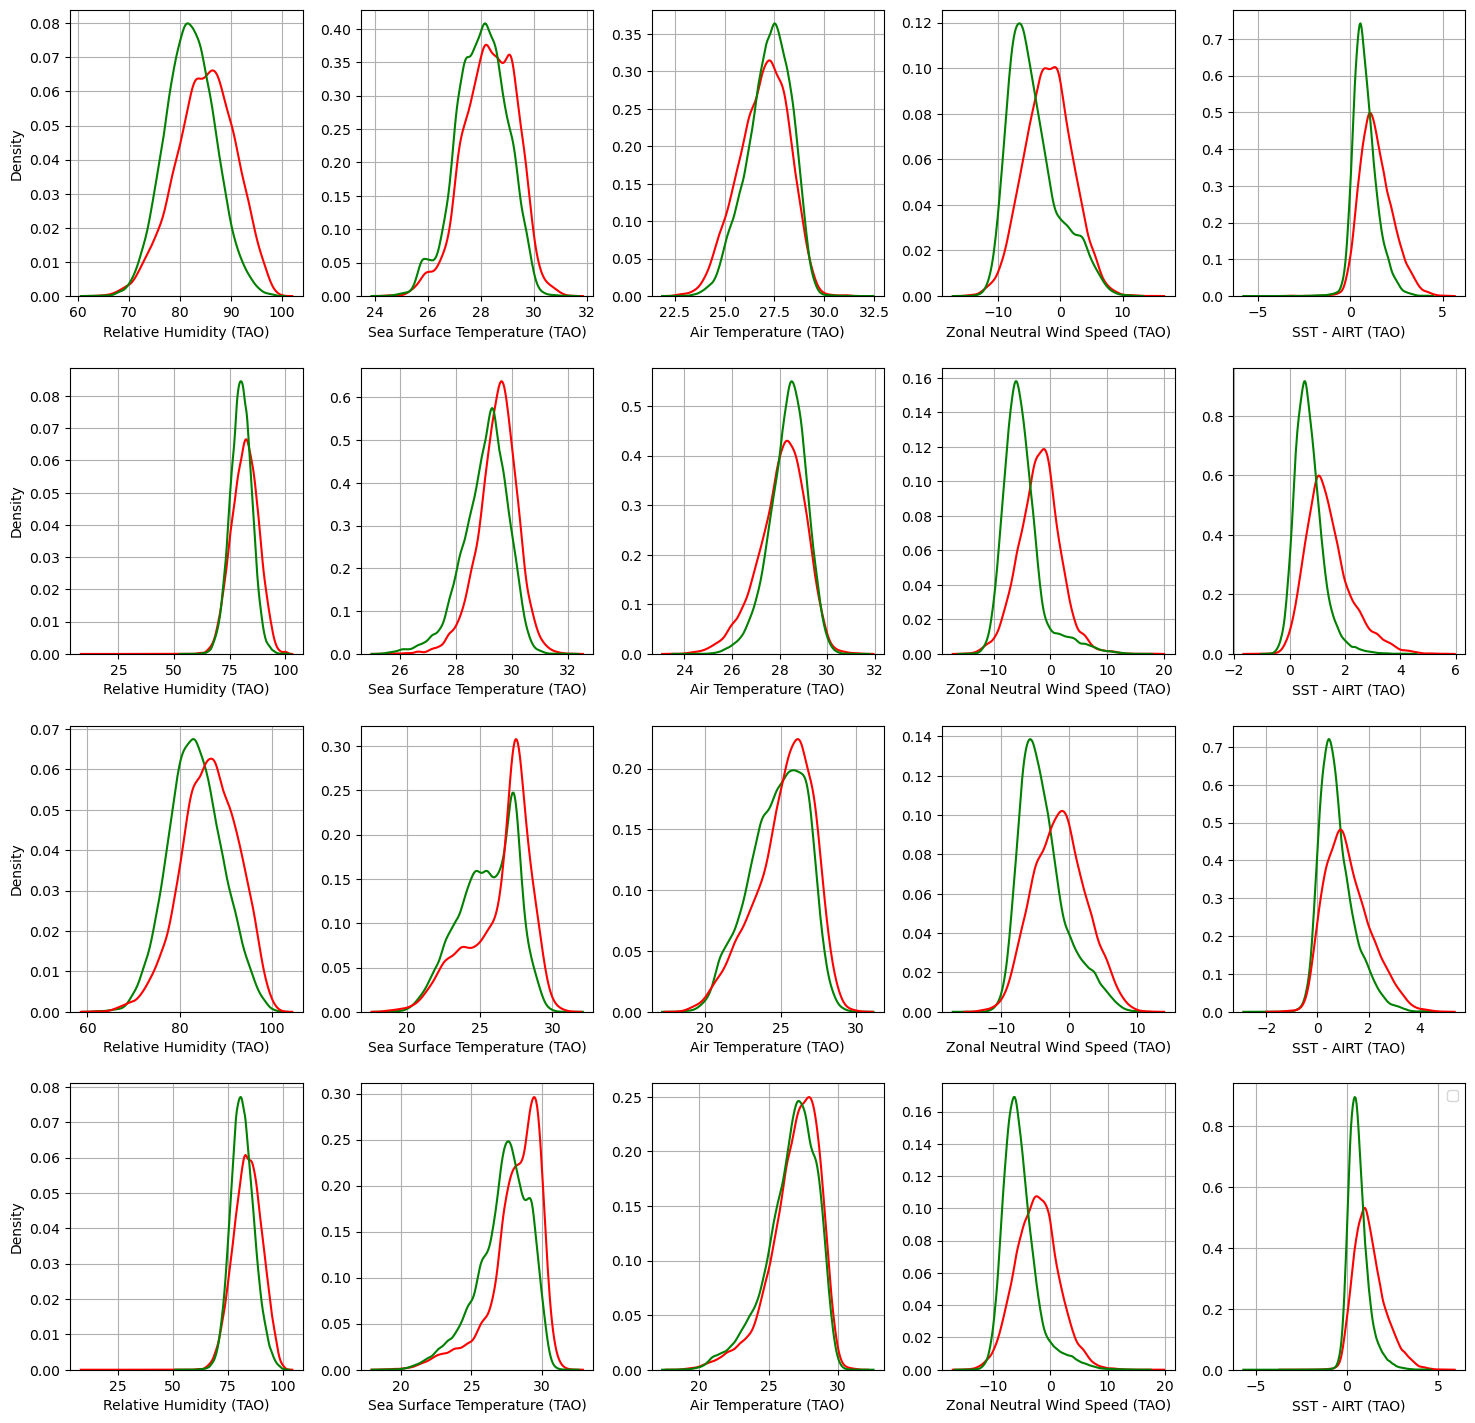

In [47]:
fig, axes = plt.subplots(nrows=4, ncols =5, sharex = False, figsize=(15,16))
histkind = "stack"
cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
custom_bins_RH = np.linspace(65,100,50)
custom_bins_SST = np.linspace(20,32,50)
custom_bins_AIRT = np.linspace(15,32,50)
custom_bins_U10x = np.linspace(-15,10,50)
ny = 10
stack_order = {'good', 'bad'}

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lat > 3 N'
ax = axes[0,0]
subDF = df.loc[df['LATITUDE'] > 3]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)

#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[0,1]
xlabel = 'Sea Surface Temperature (TAO)'
custom_bins_SST = np.linspace(25,31,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Sea Surface Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')


ax = axes[0,2]
xlabel = 'Air Temperature (TAO)'
custom_bins_AIRT = np.linspace(23,30,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Air Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[0,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')


xlabel = 'SST - AIRT (TAO)'
ax = axes[0,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[1,0]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[1,1]
xlabel = 'Sea Surface Temperature (TAO)'
custom_bins_SST = np.linspace(26,32,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Sea Surface Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[1,2]
xlabel = 'Air Temperature (TAO)'
custom_bins_AIRT = np.linspace(24,30.5,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Air Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[1,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')


xlabel = 'SST - AIRT (TAO)'
ax = axes[1,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')


################################################################################################
xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon > -120 E '

ax = axes[2,0]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
#ax.text(-0.01, 0.33, 'Eastern Pacific', transform=ax.transAxes, rotation=90)

ax = axes[2,1]
xlabel = 'Sea Surface Temperature (TAO)'
custom_bins_SST = np.linspace(20,30,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Sea Surface Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[2,2]
xlabel = 'Air Temperature (TAO)'
custom_bins_AIRT = np.linspace(20,29,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Air Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[2,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'SST - AIRT (TAO)'
ax = axes[2,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')


################################################################################################
################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[3,0]
subDF = df.copy()
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[3,1]
xlabel = 'Sea Surface Temperature (TAO)'
ax.set_ylabel('')
custom_bins_SST = np.linspace(26,32,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Sea Surface Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

ax = axes[3,2]
xlabel = 'Air Temperature (TAO)'
custom_bins_AIRT = np.linspace(24,30.5,50)

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Air Temperature')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[3,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

xlabel = 'SST - AIRT (TAO)'
ax = axes[3,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'},
             #legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')

plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.9, wspace=0.25, hspace=0.25)
#plt.savefig('StackedHistogram.png', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

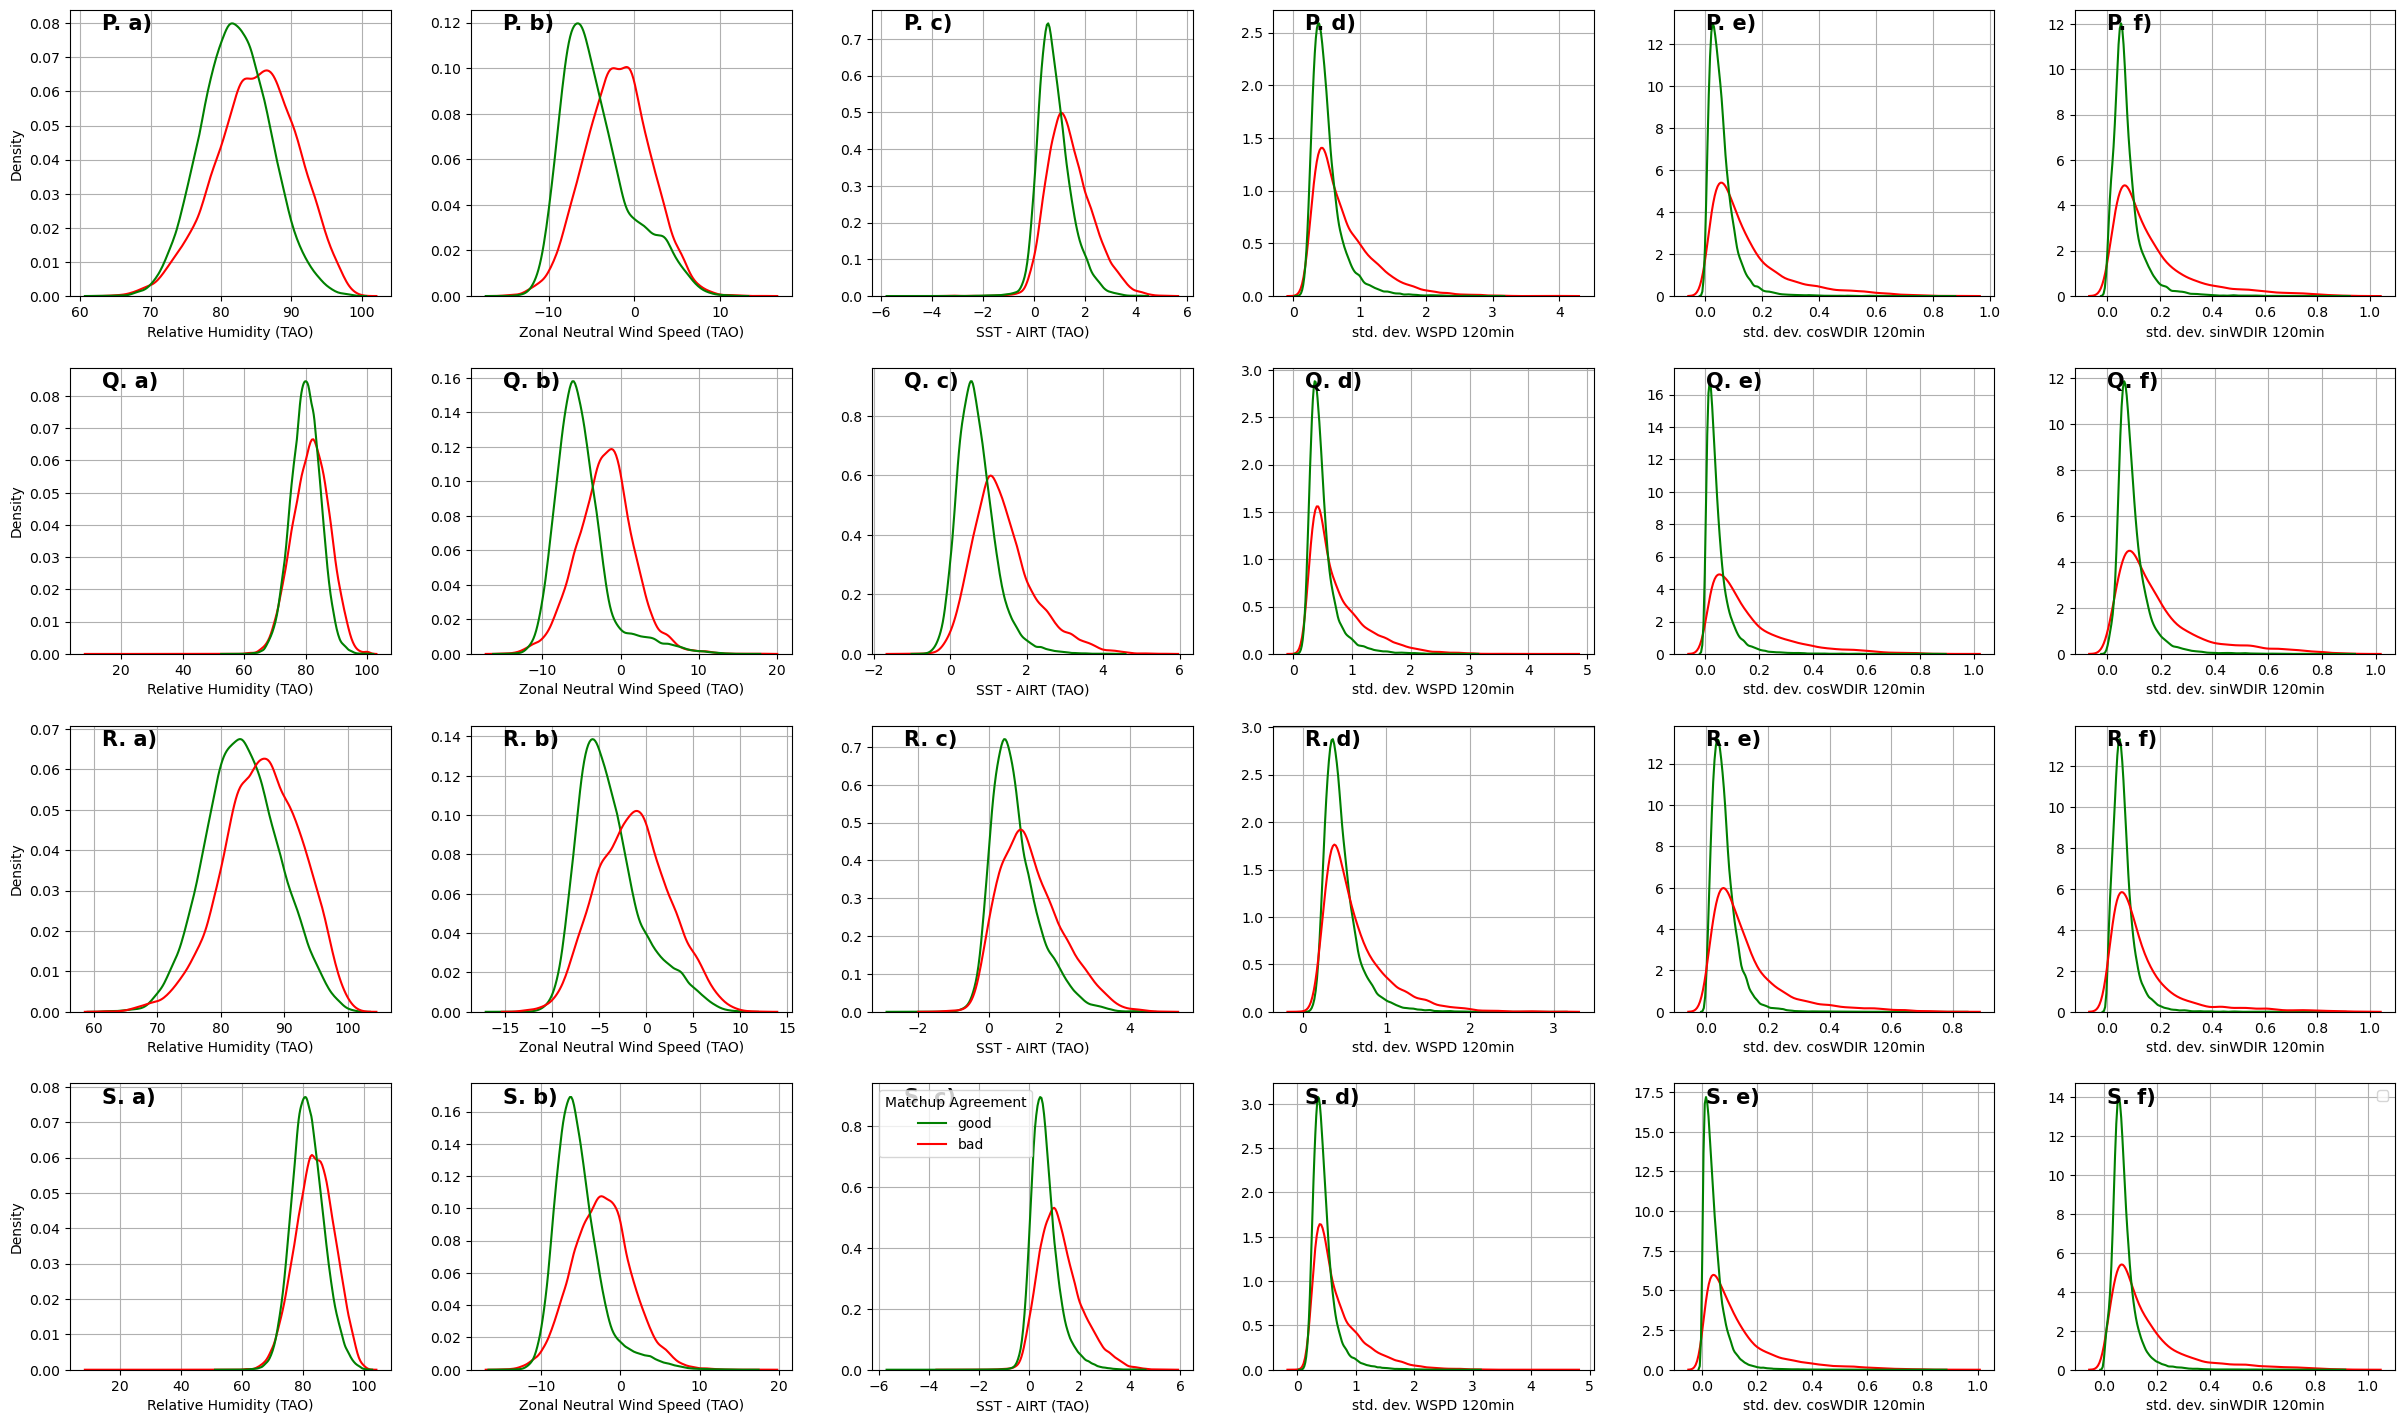

In [48]:
fig, axes = plt.subplots(nrows=4, ncols =6, sharex = False, figsize=(25,16))
histkind = "stack"
cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
custom_bins_RH = np.linspace(65,100,50)
custom_bins_SST = np.linspace(20,32,50)
custom_bins_AIRT = np.linspace(15,32,50)
custom_bins_U10x = np.linspace(-15,10,50)
ny = 10
stack_order = {'good', 'bad'}

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lat > 3 N'
ax = axes[0,0]
subDF = df.loc[df['LATITUDE'] > 3]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)

#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[0,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'SST - AIRT (TAO)'
ax = axes[0,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'std. dev. WSPD 120min'
ax = axes[0,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[0,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[0,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[1,0]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[1,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'SST - AIRT (TAO)'
ax = axes[1,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



xlabel = 'std. dev. WSPD 120min'
ax = axes[1,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[1,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[1,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon > -120 E '

ax = axes[2,0]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)
#ax.text(-0.01, 0.33, 'Eastern Pacific', transform=ax.transAxes, rotation=90)


xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[2,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'SST - AIRT (TAO)'
ax = axes[2,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'std. dev. WSPD 120min'
ax = axes[2,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[2,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[2,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[3,0]
subDF = df.copy()
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[3,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'SST - AIRT (TAO)'
ax = axes[3,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'},
             legend=True,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. WSPD 120min'
ax = axes[3,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[3,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[3,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.9, wspace=0.25, hspace=0.25)
#plt.savefig('StackedHistogram.png', dpi = 100)

In [49]:
ds

<xarray.Dataset>
Dimensions:                                                         (
                                                                     count: 148727)
Coordinates:
  * count                                                           (count) int64 ...
Data variables: (12/258)
    Wind Direction (TAO)                                            (count) float32 ...
    WDIR_QC                                                         (count) float32 ...
    WDIR_DM                                                         (count) |S1 ...
    Wind Speed (TAO)                                                (count) float32 ...
    WSPD_QC                                                         (count) float32 ...
    WSPD_DM                                                         (count) |S1 ...
    ...                                                              ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 110 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 110 min mean)  (count) float64 ...
    Speed Difference (QuikSCAT - TAO 120 min mean)                  (count) float64 ...
    Direction Difference (QuikSCAT - TAO 120 min mean)              (count) float64 ...
    Zonal Wind Speed Difference (QuikSCAT - TAO 120 min mean)       (count) float64 ...
    Meridional Wind Speed Difference (QuikSCAT - TAO 120 min mean)  (count) float64 ...

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

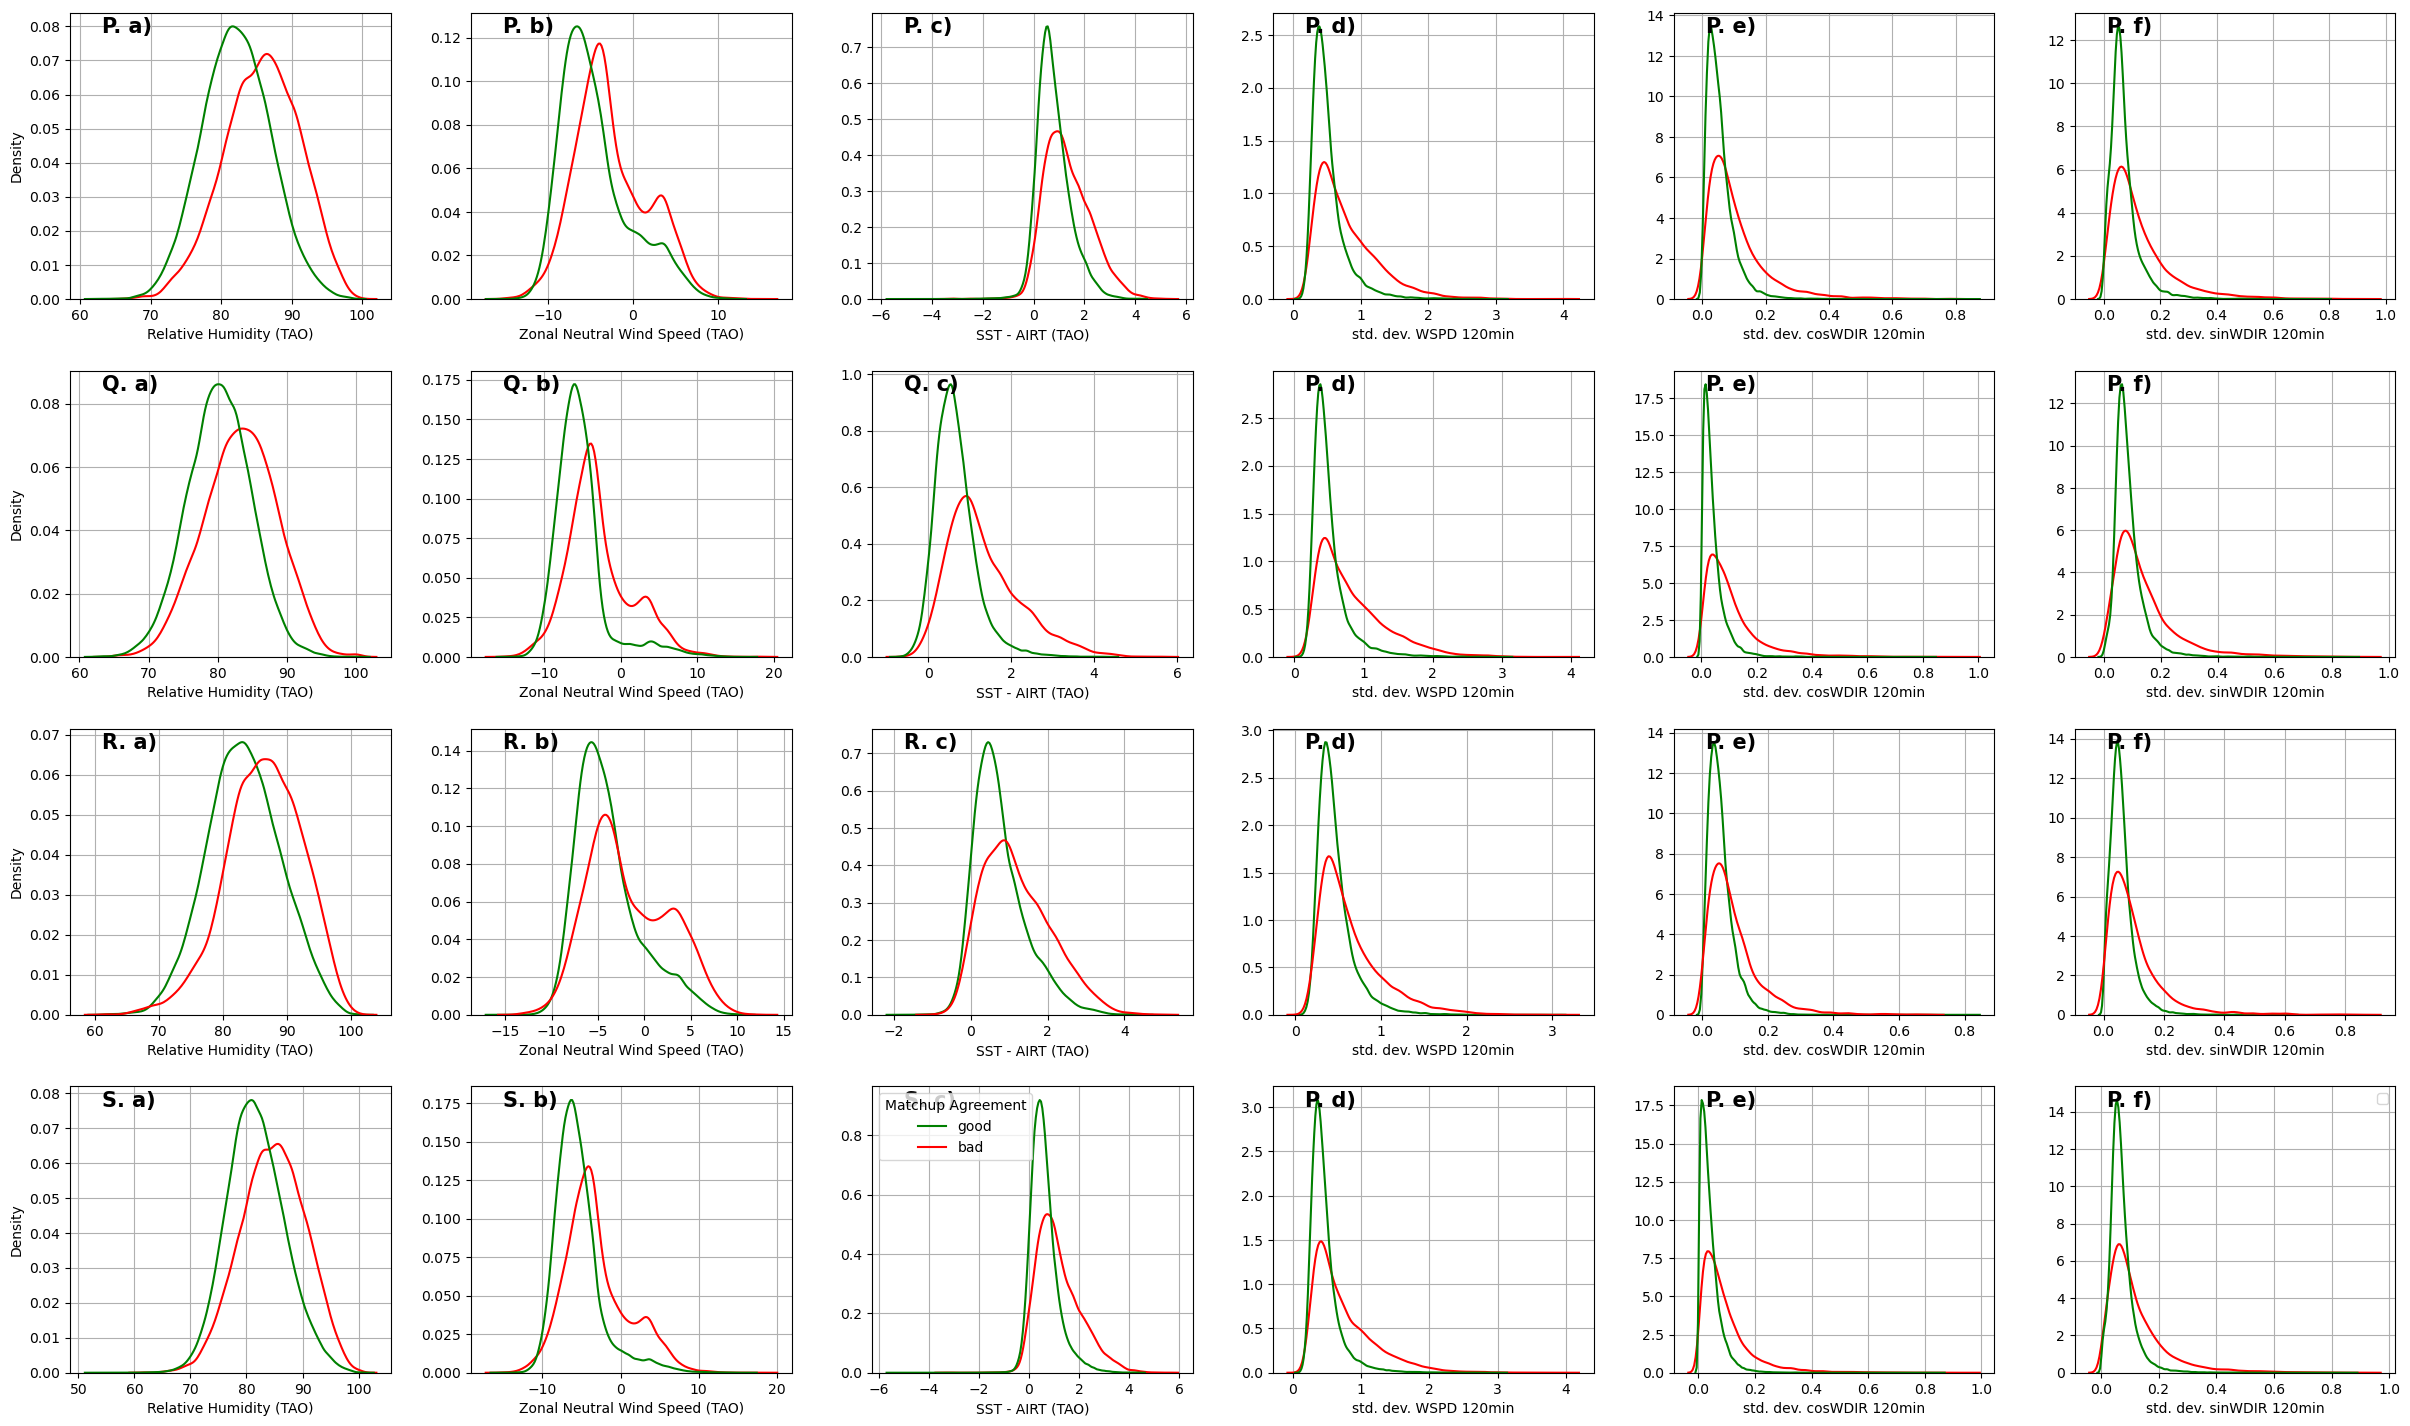

In [50]:
# Create a boolean mask for high wind speeds
highWinds = df['Wind Speed (TAO)'] > 3

# Apply the filter correctly using .loc
df = df.loc[highWinds]

fig, axes = plt.subplots(nrows=4, ncols =6, sharex = False, figsize=(25,16))
histkind = "stack"
cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
custom_bins_RH = np.linspace(65,100,50)
custom_bins_SST = np.linspace(20,32,50)
custom_bins_AIRT = np.linspace(15,32,50)
custom_bins_U10x = np.linspace(-15,10,50)
ny = 10
stack_order = {'good', 'bad'}

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lat > 3 N'
ax = axes[0,0]
subDF = df.loc[df['LATITUDE'] > 3]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)

#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[0,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'SST - AIRT (TAO)'
ax = axes[0,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'std. dev. WSPD 120min'
ax = axes[0,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[0,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[0,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[1,0]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[1,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'SST - AIRT (TAO)'
ax = axes[1,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



xlabel = 'std. dev. WSPD 120min'
ax = axes[1,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[1,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[1,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon > -120 E '

ax = axes[2,0]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)
#ax.text(-0.01, 0.33, 'Eastern Pacific', transform=ax.transAxes, rotation=90)


xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[2,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'SST - AIRT (TAO)'
ax = axes[2,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel = 'std. dev. WSPD 120min'
ax = axes[2,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[2,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[2,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
################################################################################################

xlabel = 'Relative Humidity (TAO)'
title = 'For Buoy locations lon < -165 E '
ax = axes[3,0]
subDF = df.copy()
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'Zonal Neutral Wind Speed (TAO)'
ax = axes[3,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'SST - AIRT (TAO)'
ax = axes[3,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'},
             legend=True,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. WSPD 120min'
ax = axes[3,3]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. d)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[3,4]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. e)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[3,5]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. f)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.9, wspace=0.25, hspace=0.25)
#plt.savefig('StackedHistogram.png', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecat

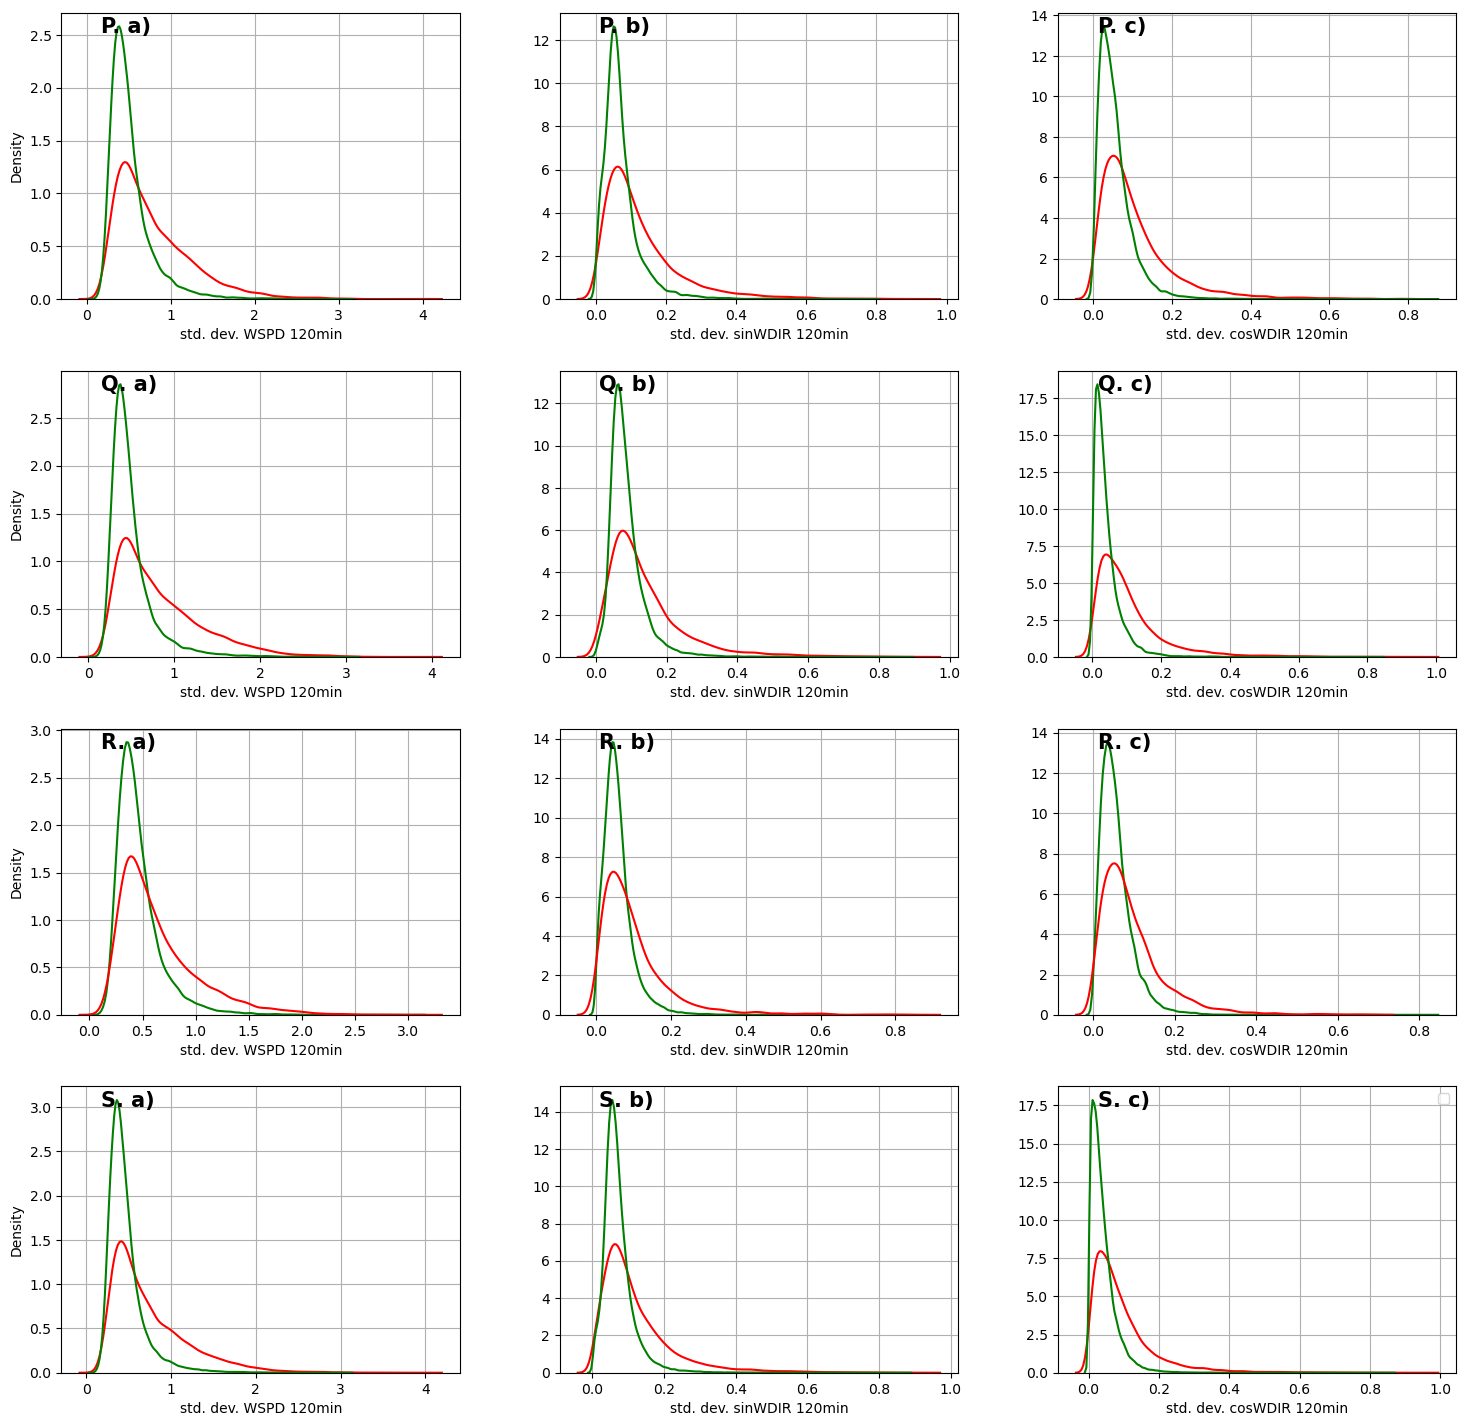

In [51]:
fig, axes = plt.subplots(nrows=4, ncols =3, sharex = False, figsize=(15,16))
histkind = "stack"
cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
custom_bins_RH = np.linspace(65,100,50)
custom_bins_SST = np.linspace(20,32,50)
custom_bins_AIRT = np.linspace(15,32,50)
custom_bins_U10x = np.linspace(-15,10,50)
ny = 10
stack_order = {'good', 'bad'}

xlabel = 'std. dev. WSPD 120min'
title = 'For Buoy locations lat > 3 N'
ax = axes[0,0]
subDF = df.loc[df['LATITUDE'] > 3]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)

#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)



xlabel = 'std. dev. sinWDIR 120min'
ax = axes[0,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel  = 'std. dev. cosWDIR 120min'
ax = axes[0,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'P. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

################################################################################################

xlabel = 'std. dev. WSPD 120min'
title = 'For Buoy locations lon < -165 E '
ax = axes[1,0]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel  = 'std. dev. sinWDIR 120min'
ax = axes[1,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


xlabel  = 'std. dev. cosWDIR 120min'
ax = axes[1,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'Q. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
xlabel  = 'std. dev. WSPD 120min'
title = 'For Buoy locations lon > -120 E '

ax = axes[2,0]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)
#ax.text(-0.01, 0.33, 'Eastern Pacific', transform=ax.transAxes, rotation=90)


xlabel = 'std. dev. sinWDIR 120min'
ax = axes[2,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel  = 'std. dev. cosWDIR 120min'
ax = axes[2,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'R. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)


################################################################################################
################################################################################################

xlabel  = 'std. dev. WSPD 120min'
title = 'For Buoy locations lon < -165 E '
ax = axes[3,0]
subDF = df.copy()
subDF = subDF.rename(columns = {'GoodBad':'Matchup Agreement'})
# goodDF = subDF.loc[subDF['GoodBad'] == 'good']
# badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#x.set_xlabel('TAO Relative Humidity')
#ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. a)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. sinWDIR 120min'
ax = axes[3,1]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'}, 
            legend=False,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. b)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

xlabel = 'std. dev. cosWDIR 120min'
ax = axes[3,2]

sns.kdeplot(subDF.iloc[::-1], x=xlabel, 
             #bins= custom_bins_RH, 
             hue='Matchup Agreement', 
             #multiple=histkind,
             palette = {'good': 'green', 'bad': 'red'},
             legend=True,
             #hue_order=stack_order,
             common_norm = False, 
             ax = ax)
#ax.set_title(title)
#ax.set_xlabel('TAO Zonal winds')
ax.set_ylabel('')
ax.grid(visible=True, which='major')
ax.text(0.1, 0.95, 'S. c)', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 15)

plt.legend()

plt.subplots_adjust(left=0.05, bottom=0.05, right=0.98, top=0.9, wspace=0.25, hspace=0.25)
#plt.savefig('StackedHistogram.png', dpi = 100)

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

Text(0, 0.5, 'Bad Data %')

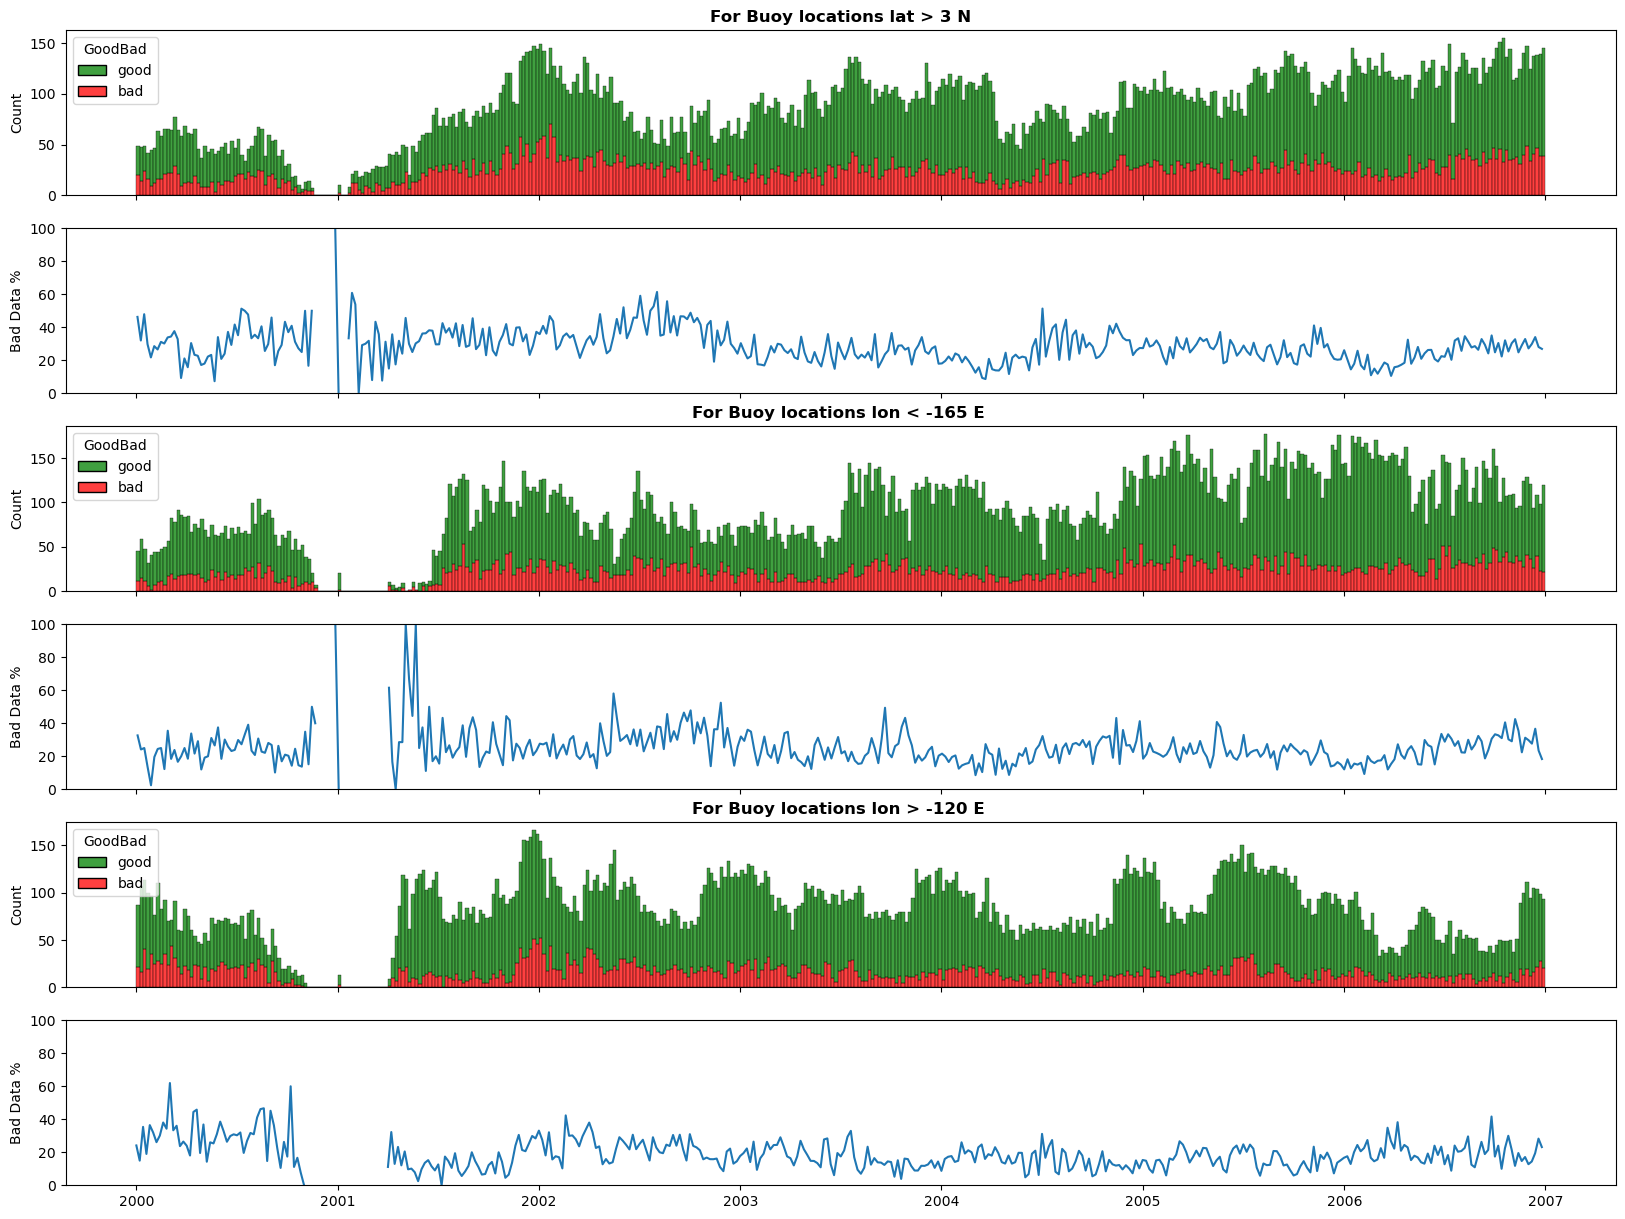

In [52]:
fig, axes = plt.subplots(nrows=6, ncols =1, sharex = True, figsize=(20,15))

cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
nx = 12*7*5 # 168
ny = 10

title = 'For Buoy locations lat > 3 N'
ax = axes[0]
subDF = df.loc[df['LATITUDE'] > 3]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

stack_order = ['good','bad']
sns.histplot(subDF, x='QS_TIME', bins= nx, hue='GoodBad',  multiple="stack", 
             palette = {'good': 'green', 'bad': 'red'}, 
             hue_order=stack_order, 
             ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')


ax = axes[1]
GoodCounts, bin_edges, _ = ax.hist(goodDF['QS_TIME'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['QS_TIME'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent)
ax.set_ylim(0,100)
ax.set_ylabel('Bad Data %')
################################################################################################

title = 'For Buoy locations lon < -165 E '
ax = axes[2]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.histplot(subDF, x='QS_TIME', bins= nx, hue='GoodBad',  multiple="stack", 
             hue_order=stack_order, 
             palette = {'good': 'green', 'bad': 'red'}, ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')

ax = axes[3]
GoodCounts, bin_edges, _ = ax.hist(goodDF['QS_TIME'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['QS_TIME'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent)
ax.set_ylim(0,100)
ax.set_ylabel('Bad Data %')
################################################################################################

title = 'For Buoy locations lon > -120 E '
ax = axes[4]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.histplot(subDF, x='QS_TIME', bins= nx, hue='GoodBad', multiple="stack",  
             hue_order=stack_order, 
             palette = {'good': 'green', 'bad': 'red'}, ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')

ax = axes[5]
GoodCounts, bin_edges, _ = ax.hist(goodDF['QS_TIME'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['QS_TIME'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent)
ax.set_ylim(0,100)
ax.set_ylabel('Bad Data %')
################################################################################################

In [53]:
df['day'] = np.array([var.timetuple().tm_yday for var in df['QS_TIME']])

/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/shikhar.rai/anaconda3/envs/mpiNetCDF/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecat

Text(0.5, 0, 'Day of year')

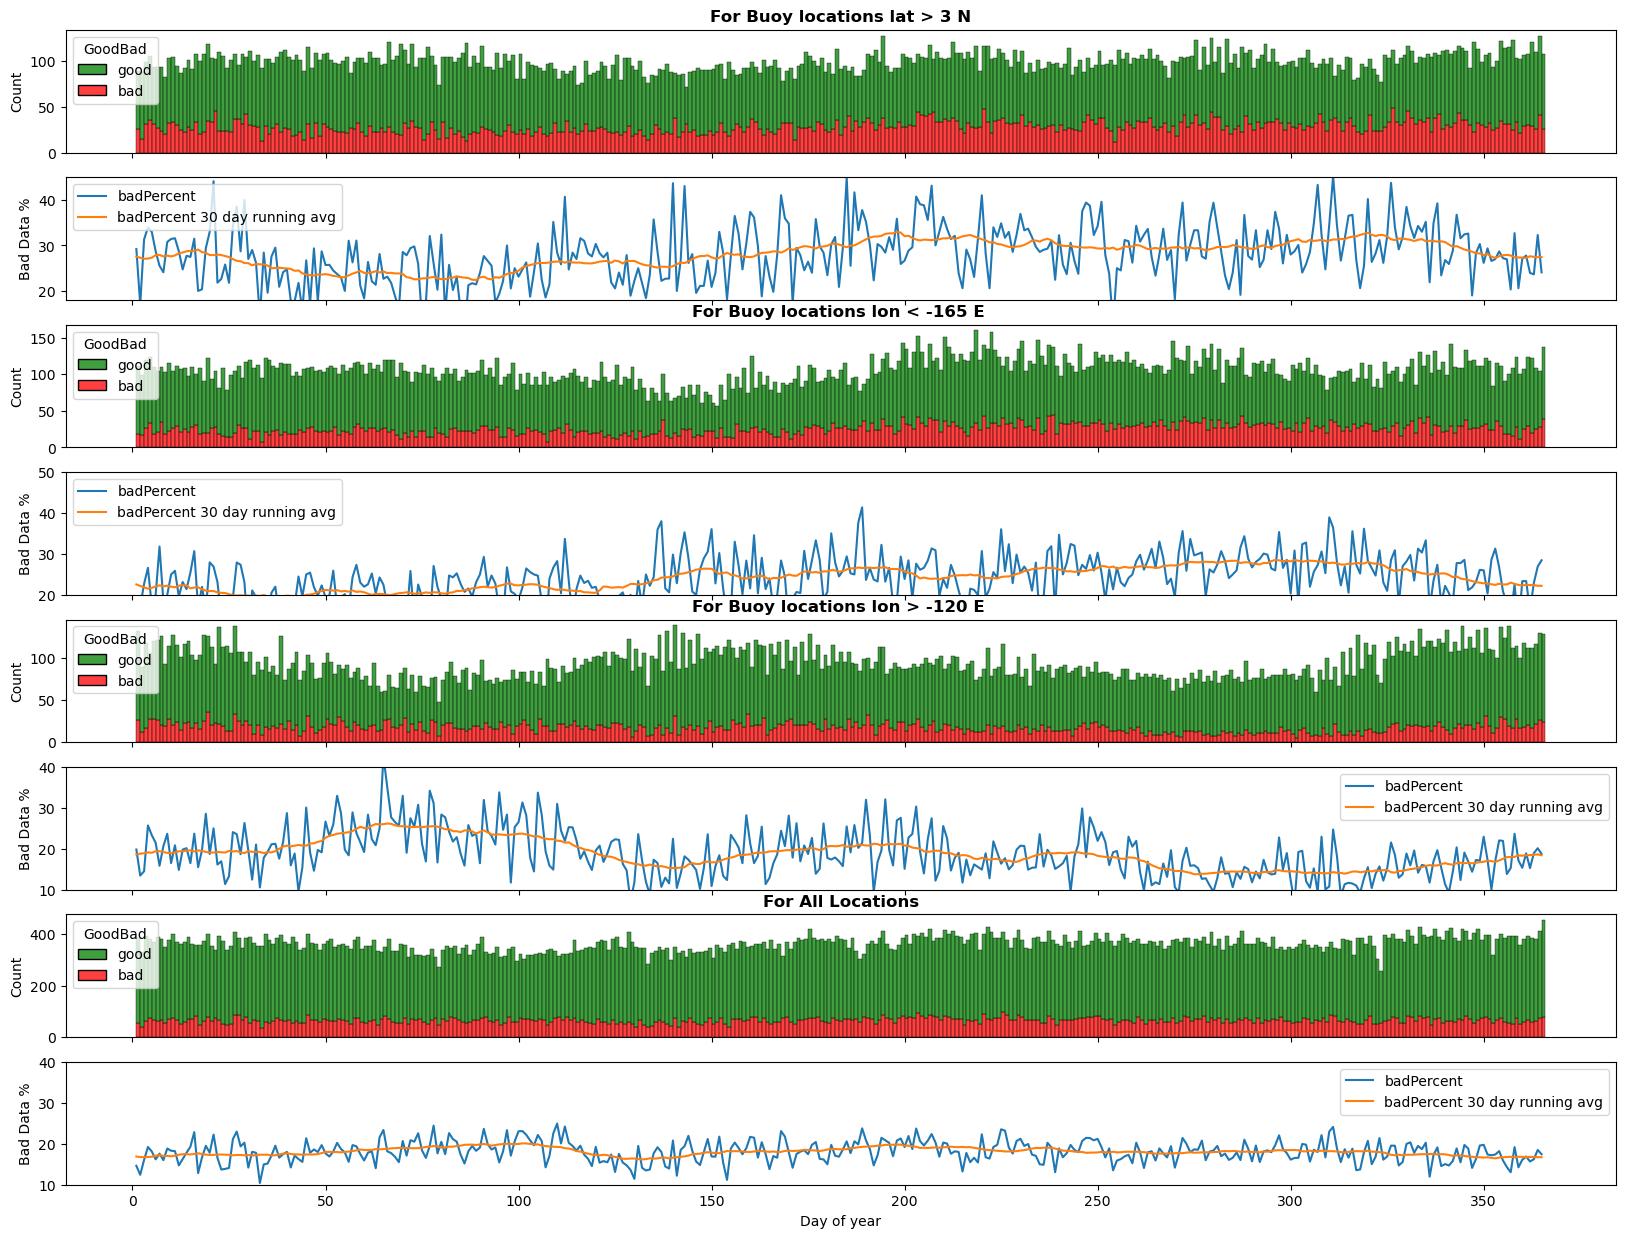

In [54]:
fig, axes = plt.subplots(nrows=8, ncols =1, sharex = True, figsize=(20,15))

cmap = plt.get_cmap('coolwarm').copy()
cmap.set_bad('white')
nx = 365 #int(365//3)
ny = 10
nrun = 30

title = 'For Buoy locations lat > 3 N'
ax = axes[0]
subDF = df.loc[df['LATITUDE'] > 3]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

stack_order = ['good','bad']
sns.histplot(subDF, x='day', bins= nx, hue='GoodBad',  multiple="stack", 
             palette = {'good': 'green', 'bad': 'red'}, 
             hue_order=stack_order, 
             ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')


ax = axes[1]
GoodCounts, bin_edges, _ = ax.hist(goodDF['day'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['day'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent, label ='badPercent')
ax.plot(bin_edges[0:-1], convolve1d(BadPercent, np.ones(nrun)/nrun, mode='wrap'), label =f'badPercent {nrun} day running avg')
ax.legend()
ax.set_ylim(18,45)
ax.set_ylabel('Bad Data %')
################################################################################################

title = 'For Buoy locations lon < -165 E '
ax = axes[2]
subDF = df.loc[df['LONGITUDE'] < (360-165)]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.histplot(subDF, x='day', bins= nx, hue='GoodBad',  multiple="stack", 
             hue_order=stack_order, 
             palette = {'good': 'green', 'bad': 'red'}, ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')

ax = axes[3]
GoodCounts, bin_edges, _ = ax.hist(goodDF['day'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['day'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent, label ='badPercent')
ax.plot(bin_edges[0:-1], convolve1d(BadPercent, np.ones(nrun)/nrun, mode='wrap'), label =f'badPercent {nrun} day running avg')
ax.legend()
ax.set_ylim(20,50)
ax.set_ylabel('Bad Data %')
################################################################################################

title = 'For Buoy locations lon > -120 E '
ax = axes[4]
subDF = df.loc[df['LONGITUDE'] > (360-120)]
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.histplot(subDF, x='day', bins= nx, hue='GoodBad', multiple="stack",  
             hue_order=stack_order, 
             palette = {'good': 'green', 'bad': 'red'}, ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')

ax = axes[5]
GoodCounts, bin_edges, _ = ax.hist(goodDF['day'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['day'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent, label ='badPercent')
ax.plot(bin_edges[0:-1], convolve1d(BadPercent, np.ones(nrun)/nrun, mode='wrap'), label =f'badPercent {nrun} day running avg')
ax.set_ylim(10,40)
ax.legend()
ax.set_ylabel('Bad Data %')
################################################################################################
################################################################################################

title = 'For All Locations'
ax = axes[6]
subDF = df.copy()
goodDF = subDF.loc[subDF['GoodBad'] == 'good']
badDF = subDF.loc[subDF['GoodBad'] == 'bad']

sns.histplot(subDF, x='day', bins= nx, hue='GoodBad', multiple="stack",  
             hue_order=stack_order, 
             palette = {'good': 'green', 'bad': 'red'}, ax = ax)
sns.move_legend(ax, "upper left")
ax.set_title(title, weight='heavy')

ax = axes[7]
GoodCounts, bin_edges, _ = ax.hist(goodDF['day'], bins=nx, color='blue', alpha=0)  # Use 
BadCounts, bin_edges, _ = ax.hist(badDF['day'], bins=nx, color='Red', alpha=0)  # Use 
BadPercent = BadCounts/(GoodCounts+BadCounts) * 100
ax.plot(bin_edges[0:-1], BadPercent, label ='badPercent')
ax.plot(bin_edges[0:-1], convolve1d(BadPercent, np.ones(nrun)/nrun, mode='wrap'), label =f'badPercent {nrun} day running avg')
ax.set_ylim(10,40)
ax.legend()
ax.set_ylabel('Bad Data %')
ax.set_xlabel('Day of year')
ax.set_xlabel('Day of year')

/tmp/ipykernel_1451034/594831144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['cos(Wind Direction (QuikSCAT))'] = np.cos(np.deg2rad(subDF['Wind Direction (QuikSCAT)']))
/tmp/ipykernel_1451034/594831144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subDF['sin(Wind Direction (QuikSCAT))'] = np.sin(np.deg2rad(subDF['Wind Direction (QuikSCAT)']))
/tmp/ipykernel_1451034/594831144.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

Text(0.1, 0.95, 'B')

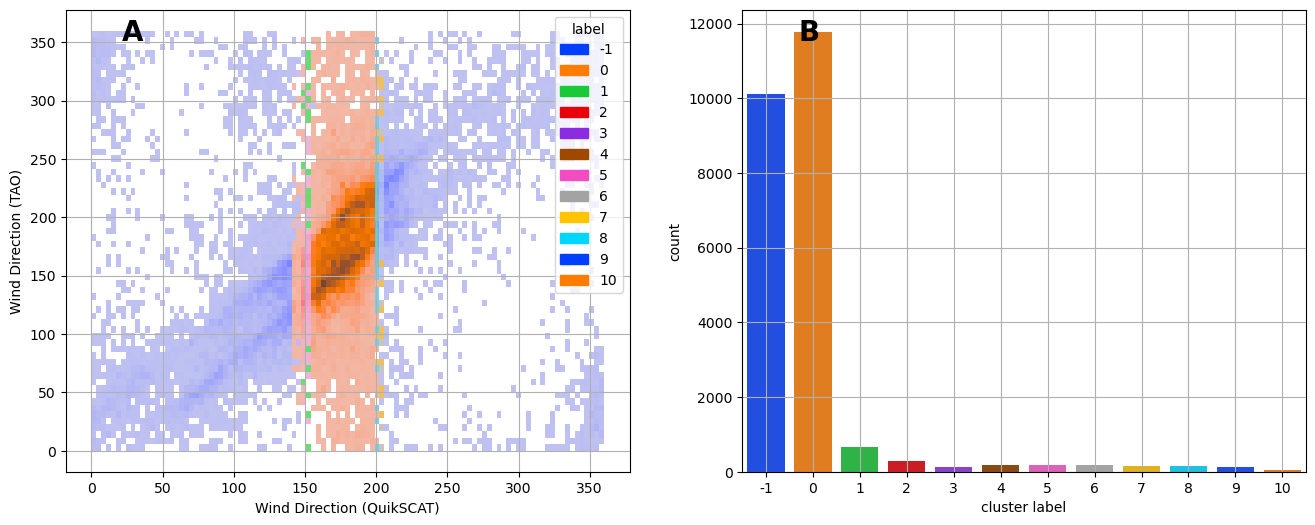

In [55]:
subDF = df.loc[df['GoodBad'] == 'bad']

subDF['cos(Wind Direction (QuikSCAT))'] = np.cos(np.deg2rad(subDF['Wind Direction (QuikSCAT)']))
subDF['sin(Wind Direction (QuikSCAT))'] = np.sin(np.deg2rad(subDF['Wind Direction (QuikSCAT)']))

subDF['cos(Wind Direction (TAO))'] = np.cos(np.deg2rad(subDF['Wind Direction (TAO)']))
subDF['sin(Wind Direction (TAO))'] = np.sin(np.deg2rad(subDF['Wind Direction (TAO)']))

selectX = ['cos(Wind Direction (QuikSCAT))',
           'sin(Wind Direction (QuikSCAT))']
           # 'cos(Wind Direction (TAO))',
           # 'sin(Wind Direction (TAO))']

# 'cos(Direction Difference (QuikSCAT - TAO))',
#            'sin(Direction Difference (QuikSCAT - TAO))',
X = subDF[selectX]

normX = (X - X.mean(axis=0))/ X.std(axis=0)

# kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto", max_iter = 10000).fit(normX)
# subDF['label'] = kmeans.labels_

dbscan = DBSCAN(eps=0.01, min_samples= 100)
subDF['label'] = dbscan.fit_predict(normX)

# optics = OPTICS(min_samples=50 ) #cluster_method='dbscan', eps=0.25)
# df['label'] = optics.fit_predict(normX)

fig,  axes = plt.subplots(ncols = 2, figsize=(16,6))

ax = axes[0]
# ax.remove()  # Remove the existing second subplot
# ax = fig.add_subplot(121, projection='polar')
xlabel = 'Wind Direction (QuikSCAT)'
ylabel = 'Wind Direction (TAO)'

s = sns.histplot(subDF, x=xlabel, y = ylabel,#levels=10, 
                hue='label', common_norm=True, #cbar = True,
                palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')

ax.text(0.1, 0.95, 'A', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)

#ax.set_xlim(-10,15)

ax = axes[1]
s = sns.countplot(subDF, x='label',palette = sns.color_palette("bright"), ax = ax)

ax.grid(visible=True, which='both', axis='both')
ax.set_xlabel('cluster label')
#ax.set_ylabel('cluster label')

ax.text(0.1, 0.95, 'B', horizontalalignment='left',
        verticalalignment='center', transform=ax.transAxes,
        weight = 'heavy', fontsize = 20)


#plt.savefig('PDF_byCluster_10min.png', dpi=100)

In [56]:
sns.histplot(ssubDF, x = 'D)

SyntaxError: unterminated string literal (detected at line 1) (462669772.py, line 1)

In [ ]:
fig,  axes = plt.subplots(ncols = 2 , figsize=(20,6))

xlabel = 'Speed Difference (QuikSCAT - TAO)'
ylabel = 'Direction Difference (QuikSCAT - TAO)'

ax = axes[0]
#ssubDF = subDF.loc[df['label']]
s = sns.histplot(subDF, x=xlabel, y = ylabel,
                hue='label',  ax = ax, #cbar = True,
                palette = sns.color_palette("bright"))

ax = axes[1]
#ssubDF = subDF.loc[df['label']]
s = sns.histplot(df, x=xlabel, y = ylabel,  ax = ax )
